<div align="center">
  <h1>DETECCIÓN DE FRAUDE EN PAGOS CON TELÉFONOS MÓVILES</h1>
  <img src="https://aniview.com/wp-content/uploads/2022/02/mobile-ad-fraud.png" width="500"/>
</div>



## 1. TEMA

Pagar con el teléfono móvil ha incrementado notablemente su popularidad, ya que permite tanto realizar compras en comercios físicos y online como intercambiar dinero en pequeñas cantidades entre amistades, familia o particulares en general. Una app y un smartphone harán la labor de transferir dinero de una cuenta o tarjeta a otra persona o comercio.

Según datos del informe de 2020 que realizó Worldpay sobre pagos en todo el mundo, el uso de tarjetas de crédito y débito han bajado entre 2019 y 2020 de un 35% conjunto a un 27%. Por su parte, los pagos digitales o pagos móviles siguieron con su tendencia ascendente. De un 42% de uso en 2019 en todo el mundo a un 52% en 2020. Y todo apunta a que seguirá siendo así.

La pregunta que surge por parte de firmas de seguridad es: ¿es el pago móvil seguro? ¿Deberíamos adquirir nuevos hábitos de seguridad para no caer en estafas online? La popularidad del pago móvil lo coloca en la diana del fraude online. Así que es inevitable que las estafas dirigidas al usuario doméstico se hagan pasar por métodos de pago móvil si cada vez es más popular.

El objetivo del proyecto crear un modelo de Machine Learning que permita detectar si una transacción realizada con teléfono móvil es fraudulenta.

### 1.1 Link repositorio GitHub

https://github.com/LidiaMiranda/Fraud-detection-ML

## 2. DATASET ORIGINAL Y ACONDICIONAMIENTO DE DATOS

### 2.1. Dataset

- Nombre: Synthetic Financial Datasets For Fraud Detection
- URL: https://www.kaggle.com/datasets/ealaxi/paysim1
- Breve resumen del contenido del DataSet:

Debido a la dificultad de encontrar datasets de transacciones bancarias con datos reales (por políticas de privacidad) que ayuden a generar modelos de prevención de fraude, se ha utilizado la herramienta **PaySim** para generar este dataset.

PaySim es un software que automatiza las pruebas de sistemas de pago. Este tipo de software puede simular una gran cantidad de escenarios de pago, permitiendo a bancos y empresas financieras evaluar sus sistemas de forma concienzuda y asegurar que están funcionando correctamente.

Por lo tanto, es una herramienta especializada en generar datos ficticios sobre transacciones de pago para facilitar la labor de quienes deseean generar herramientas de prevención de fraude, entre otras.

#### 2.1.1 Explicación columnas

A continuación se resumirá brevemente el contenido de las columnas:

- Step. Numérica. Representa la hora del mes en el que se hace la transacción.

- Type. Categórica. Tipo de transacción (pago, transferencia, retirada de fondo, etc.).

- Amount. Numérica. Importe de la transacción.

- NameOrig. Categórica. Código de indentificación de quien origina la transacción. Consta de una letra C o M seguida de una serie de números. C significa "customer" y M significa "merchant".

- OldbalanceOrg. Numérica. Representa el balance en cuenta de quien origina la transacción antes de que se realice la misma.

- NewbalanceOrig. Numérica. Representa el balance en cuenta de quien origina la transacción después de que se realice la misma.

- NameDest. Categórica. Código de indentificación del beneficiario de la transacción. Consta de una letra C o M seguida de una serie de números. C significa "customer" y M significa "merchant".

- OldbalanceDest. Numérica. Representa el balance en cuenta del beneficiario de la transacción antes de que se realice la misma.

- NewbalanceDest.Numérica. Representa el balance en cuenta del beneficiario de la transacción después de que se realice la misma.

- IsFraud.Numérica. Representa si la transacción es fraudulenta (1) o no (0).

- IsFlaggedFraud. Representa si la transacción es sospechosa de fraude (1) o no (0).


### 2.2 Acondicionamiento de datos

In [ ]:
#Activar drive en colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos librerías y funciones
from utils.utilsML import *

In [ ]:
#Lectura y visualización datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/raw/data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info(null_counts=True)
#No hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [ ]:
#Nombres columnas en minúscula
df.columns = df.columns.str.lower()

#### 2.2.1 Columnas categóricas

En las columnas nameorig y namedest se decide eliminar el ID de la transacción y quedarnos sólo con C (customer) y M (merchant) para simplificar la interpretación de los datos.

In [ ]:
#Nos quedamos solo con la primera letra de cada fila, que determina quién realiza la transacción (cliente o comercio)
df['nameorig'] = df['nameorig'].str[0]
df['namedest'] = df['namedest'].str[0]

#### 2.2.2 Columnas numéricas

- La columna step representa las horas en un mes (de 1 a 744). Se determina crear una columna llamada day y otra hour, donde day vaya de 1-30 y hour vaya de 1-24 de forma cíclica. Con esto, intenamos mejorar el modelo.
- Tras verificar que todas las columnas donde hay sospecha de fraude (isflaggedfraud) terminan siendo fraude (isfraud), eliminaremos la columna isflaggedfraud.

In [ ]:
#Creamos columna "day", donde se indica el día de la transacción
df['day'] = (df['step'] - 1) // 24 + 1

#Creamos columna "hour", donde se indica la hora del día en la que se hizo la transacción
df['hour'] = (df['step'] - 1) % 24 + 1

In [ ]:
#Reorganizamos las columnas para que day y hour estén al principio
df = df[['day', 'hour','step', 'type', 'amount', 'nameorig', 'oldbalanceorg', 'newbalanceorig',
       'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud',
       'isflaggedfraud']]

df.head()

,day,hour,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,1,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0
1,1,1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0
2,1,1,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0
3,1,1,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0
4,1,1,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0


In [ ]:
df.tail()

,day,hour,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
6362615,31,23,743,CASH_OUT,339682.13,C,339682.13,0.00,C,0.00,339682.13,1,0
6362616,31,23,743,TRANSFER,6311409.28,C,6311409.28,0.00,C,0.00,0.00,1,0
6362617,31,23,743,CASH_OUT,6311409.28,C,6311409.28,0.00,C,68488.84,6379898.11,1,0
6362618,31,23,743,TRANSFER,850002.52,C,850002.52,0.00,C,0.00,0.00,1,0
6362619,31,23,743,CASH_OUT,850002.52,C,850002.52,0.00,C,6510099.11,7360101.63,1,0


In [ ]:
#Comprobamos que todas las transacciones donde "isflaggedfraud" es 1 son fraudes
df_flagged = df[df['isflaggedfraud'] == 1]
df_flagged

,day,hour,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
2736446,9,20,212,TRANSFER,4953893.08,C,4953893.08,4953893.08,C,0.00,0.00,1,1
3247297,11,10,250,TRANSFER,1343002.08,C,1343002.08,1343002.08,C,0.00,0.00,1,1
3760288,12,15,279,TRANSFER,536624.41,C,536624.41,536624.41,C,0.00,0.00,1,1
5563713,17,3,387,TRANSFER,4892193.09,C,4892193.09,4892193.09,C,0.00,0.00,1,1
5996407,18,17,425,TRANSFER,10000000.00,C,19585040.37,19585040.37,C,0.00,0.00,1,1
5996409,18,17,425,TRANSFER,9585040.37,C,19585040.37,19585040.37,C,0.00,0.00,1,1
6168499,24,2,554,TRANSFER,3576297.10,C,3576297.10,3576297.10,C,0.00,0.00,1,1
6205439,25,10,586,TRANSFER,353874.22,C,353874.22,353874.22,C,0.00,0.00,1,1
6266413,26,17,617,TRANSFER,2542664.27,C,2542664.27,2542664.27,C,0.00,0.00,1,1
6281482,27,22,646,TRANSFER,10000000.00,C,10399045.08,10399045.08,C,0.00,0.00,1,1


In [ ]:
#Sin embargo, no todas las transacciones sospechosas de fraude ('isflaggedfraud') terminan siendo realmente fraude.
df_fraud = df[df['isfraud'] == 1]
df_fraud.head(10)

,day,hour,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
2,1,1,1,TRANSFER,181.00,C,181.00,0.0,C,0.0,0.00,1,0
3,1,1,1,CASH_OUT,181.00,C,181.00,0.0,C,21182.0,0.00,1,0
251,1,1,1,TRANSFER,2806.00,C,2806.00,0.0,C,0.0,0.00,1,0
252,1,1,1,CASH_OUT,2806.00,C,2806.00,0.0,C,26202.0,0.00,1,0
680,1,1,1,TRANSFER,20128.00,C,20128.00,0.0,C,0.0,0.00,1,0
681,1,1,1,CASH_OUT,20128.00,C,20128.00,0.0,C,6268.0,12145.85,1,0
724,1,1,1,CASH_OUT,416001.33,C,0.00,0.0,C,102.0,9291619.62,1,0
969,1,1,1,TRANSFER,1277212.77,C,1277212.77,0.0,C,0.0,0.00,1,0
970,1,1,1,CASH_OUT,1277212.77,C,1277212.77,0.0,C,0.0,2444985.19,1,0
1115,1,1,1,TRANSFER,35063.63,C,35063.63,0.0,C,0.0,0.00,1,0


In [ ]:
#Hay 16 filas donde la cantidad de la transacción es 0
df_zero_amount = df[df['amount'] == 0]
df_zero_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2736447 to 6362585
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             16 non-null     int64  
 1   hour            16 non-null     int64  
 2   step            16 non-null     int64  
 3   type            16 non-null     object 
 4   amount          16 non-null     float64
 5   nameorig        16 non-null     object 
 6   oldbalanceorg   16 non-null     float64
 7   newbalanceorig  16 non-null     float64
 8   namedest        16 non-null     object 
 9   oldbalancedest  16 non-null     float64
 10  newbalancedest  16 non-null     float64
 11  isfraud         16 non-null     int64  
 12  isflaggedfraud  16 non-null     int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.8+ KB


In [ ]:
#Al ser solo 16 filas, las eliminamos.
df = df[df['amount'] != 0]

In [ ]:
#Verificamos el balance de cuenta de los beneficiarios de las transacciones antes y después de las mismas.
df['oldbalancedest'].value_counts()

0.00           2704382
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
6437632.90           1
692613.44            1
967022.27            1
327279.67            1
6510099.11           1
Name: oldbalancedest, Length: 3614690, dtype: int64

In [ ]:
df['newbalancedest'].value_counts()

0.00           2439427
10000000.00         53
971418.91           32
19169204.93         29
16532032.16         25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: newbalancedest, Length: 3555499, dtype: int64

Vemos que las columnas que representan el balance en cuenta de los beneficiarios de las trasacciones no son representativas. No es lógico que en la columna "newbalancedest" haya más de 2 millones de filas con el importe a 0, cuando se supone que ya se ha recibido la transacción. Por ello, se determina eliminar las 2 columnas que ataen a los beneficiarios: "oldbalancedest" y "newbalancedest"

Eliminamos las columnas "isflaggedfraud" y "step", "oldbalancedest" y "newbalancedest".

In [ ]:
df = df.drop(['isflaggedfraud','step', 'oldbalancedest', 'newbalancedest'], axis=1)

#### 2.2.3 Target

La columna 'isfraud' será el objetivo de nuestros modelos. Vamos a analizarla.

In [ ]:
#Ver balance del target
df.isfraud.value_counts()

0    6354407
1       8197
Name: isfraud, dtype: int64

### 2.3 Guardamos el dataset procesado.

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/dataeda.csv', index=False)

In [ ]:
#Celda para llamar csv con lo procesado hasta ahora.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/dataeda.csv')

## 3. VISUALIZACIÓN DE DATOS

### 3.1 Análisis univariante

Comencemos visualizando los parámetros estadísticos más representativos. Para ello, vamos a dividir nuestras columnas en diferentes grupos, para visualizar mejor los datos.

In [ ]:
amounts = df[['amount', 'oldbalanceorg', 'newbalanceorig']]

<Figure size 1000x500 with 0 Axes>

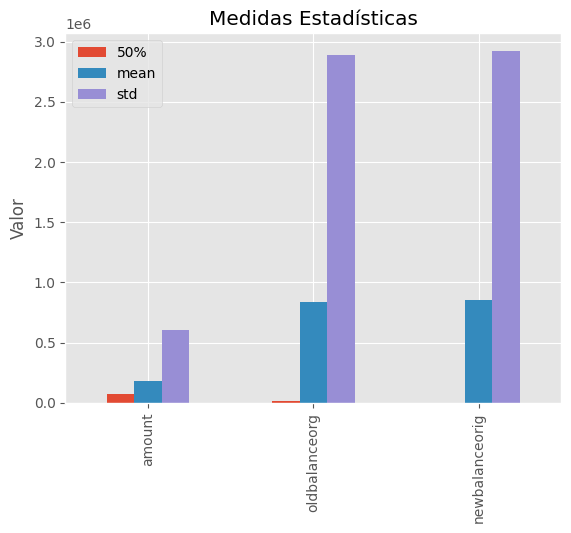

In [ ]:
# Obtener el resumen estadístico para las columnas de interés
summary_stats = amounts.describe().loc[['50%', 'mean','std'], :]

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
summary_stats.T.plot(kind='bar')
plt.ylabel('Valor')
plt.title('Medidas Estadísticas')
plt.legend(loc='upper left')
plt.show();

In [ ]:
col_time = df[['day','hour']]

<Figure size 1000x500 with 0 Axes>

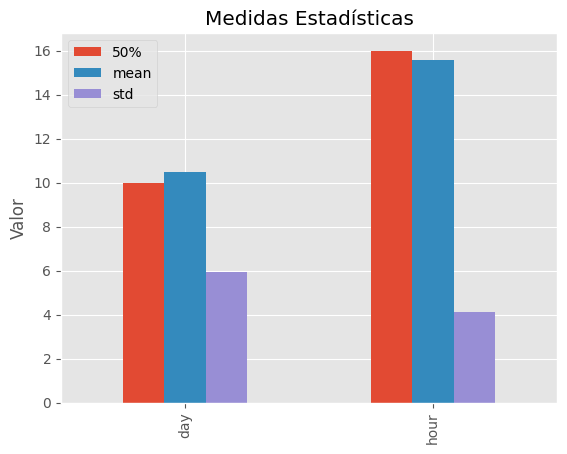

In [ ]:
# Obtener el resumen estadístico para las columnas de interés
summary_stats = col_time.describe().loc[['50%', 'mean','std'], :]

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
summary_stats.T.plot(kind='bar')
plt.ylabel('Valor')
plt.title('Medidas Estadísticas')
plt.legend(loc='upper left')
plt.show();

Analicemos ahora el target. El gráfico muestra que los datos están extremadamente desbalanceados.

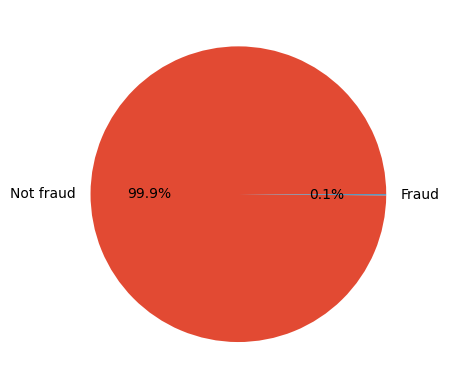

In [ ]:
#Graficamos el balance del target

plt.pie(data=df,x=df.isfraud.value_counts(),labels=['Not fraud','Fraud'],autopct='%1.1f%%');

En cuanto al tipo de transacción, vemos que predominan la retirada de fondos y los pagos, ambas con más de dos millones de transacciones.

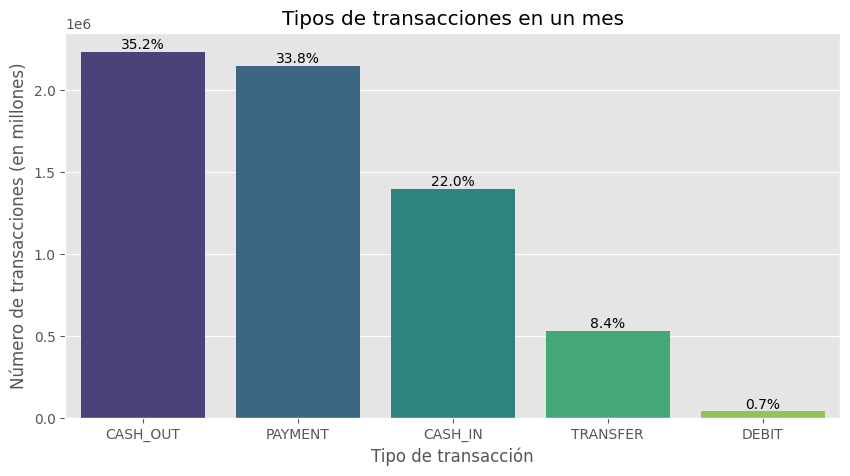

In [ ]:
#Datos básicos del gráfico
order = df.type.value_counts().index.tolist()
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df.type, order=order, palette='viridis')

# Mostrar porcentajes en las columnas
total = float(len(df.type))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

#Títulos
plt.title('Tipos de transacciones en un mes')
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones (en millones)');

A continuación, se analiza la distribución de las transacciones según el día y la hora. Se observa que, durante el mes, se realizan más transacciones del 1 al 3, y luego entre los días 5 y 18. En cuanto a las horas del día, se registran mayor número de transacciones entre las 6 y las 8 de la tarde.

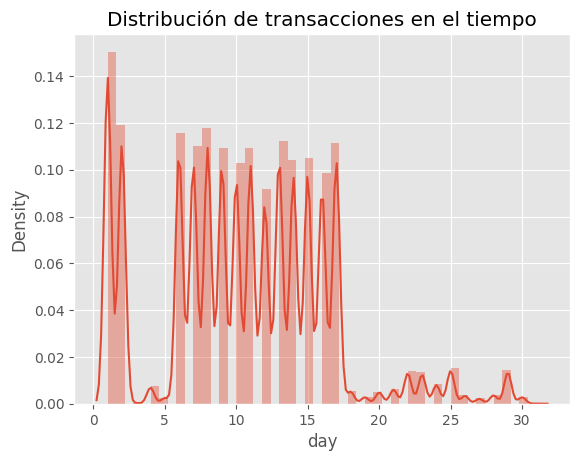

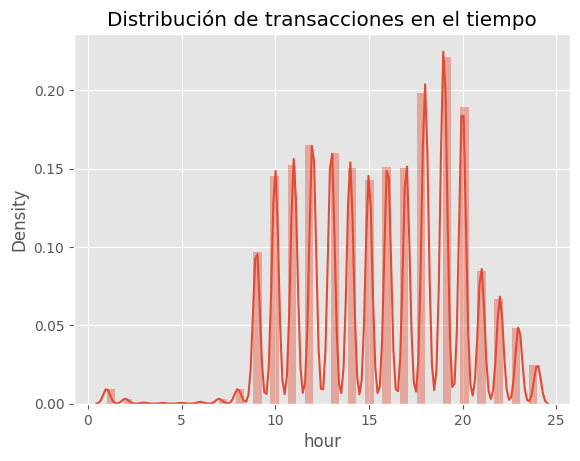

In [ ]:
#Representamos las columnas temporales mediante un diagrama de distribución
col_time = df[['day','hour']]
for col in col_time.columns:
    sns.distplot(x = col_time[col])
    sns.color_palette("viridis")
    plt.xlabel(col)
    plt.title('Distribución de transacciones en el tiempo')
    plt.show();

En cuanto al importe de las transacciones, se ve que la mayoría se mantiene por debajo de los 20 millones. Sin embargo, parece haber una cantidad nada desdeñable de transacciones con importes superiores a los 50 millones.

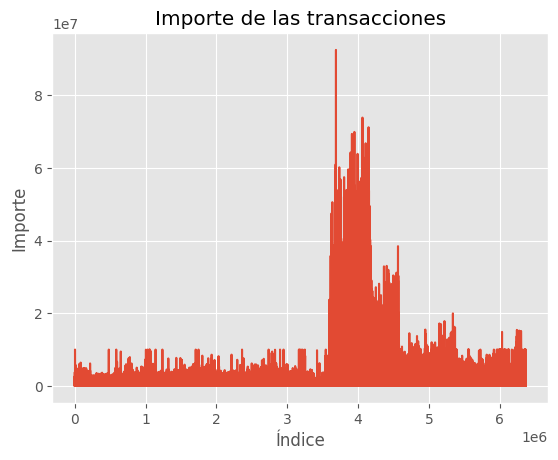

In [ ]:
plt.plot(df['amount'])
plt.xlabel('Índice')
plt.ylabel('Importe')
plt.title('Importe de las transacciones')
plt.show()

El cuanto al origen y el destino de las transacciones, se observa que el 100% de las mismas las ordena un cliente. En cuanto a los beneficiarios de las transacciones, apenas un 33% son comercios. Por lo tanto, se puede afirmar que más de la mitad de las transacciones se realizaron entre clientes.

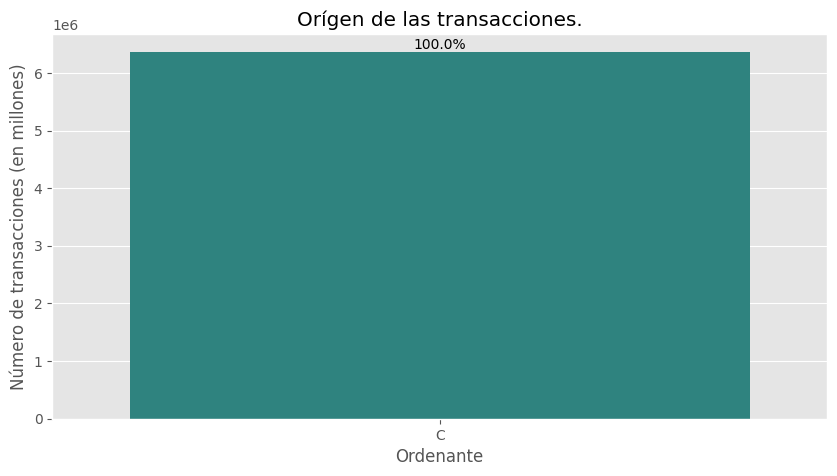

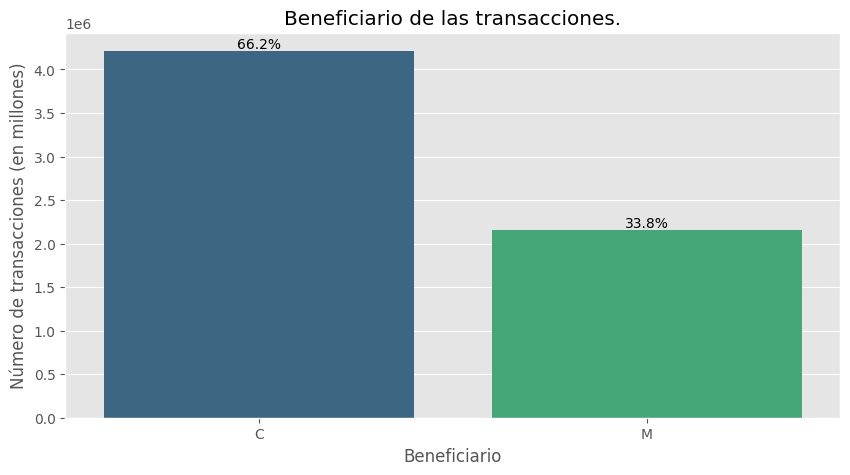

In [ ]:
columns = ["nameorig", "namedest"]

for column in columns:
    order = df[column].value_counts().index.tolist()
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=df[column], order=order, palette='viridis')

    # Mostrar porcentajes en las columnas
    total = float(len(df[column]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    # Títulos
    if column == 'nameorig':
        plt.title('Orígen de las transacciones.')
        plt.xlabel('Ordenante')
    elif column == 'namedest':
        plt.title('Beneficiario de las transacciones.')
        plt.xlabel('Beneficiario')
    plt.ylabel('Número de transacciones (en millones)')

    plt.show()


En cuanto a la distribución de los importes en cuenta de ordenantes y beneficiarios, vemos que no hay apenas variación antes y después de que se realicen las transacciones.

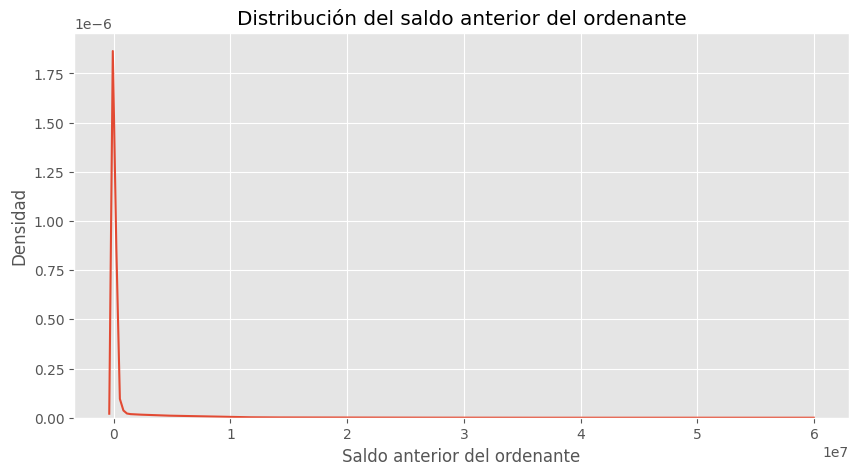

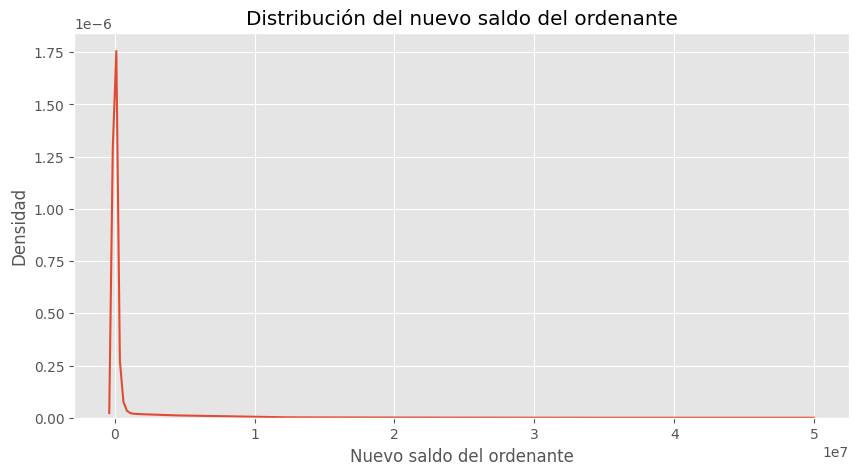

In [ ]:
balance_ord = ["oldbalanceorg", "newbalanceorig"]

for column in balance_ord:
    plt.figure(figsize=(10, 5))
    ax = sns.kdeplot(data=df, x=column, palette='viridis')

    # Títulos
    if column == 'oldbalanceorg':
        plt.title('Distribución del saldo anterior del ordenante')
        plt.xlabel('Saldo anterior del ordenante')
    elif column == 'newbalanceorig':
        plt.title('Distribución del nuevo saldo del ordenante')
        plt.xlabel('Nuevo saldo del ordenante')
    plt.ylabel('Densidad')

    plt.show()


### 3.2 Análisis bivariante

- #### Comparación de las transacciones fraudulentas según la hora del día y el día del mes.

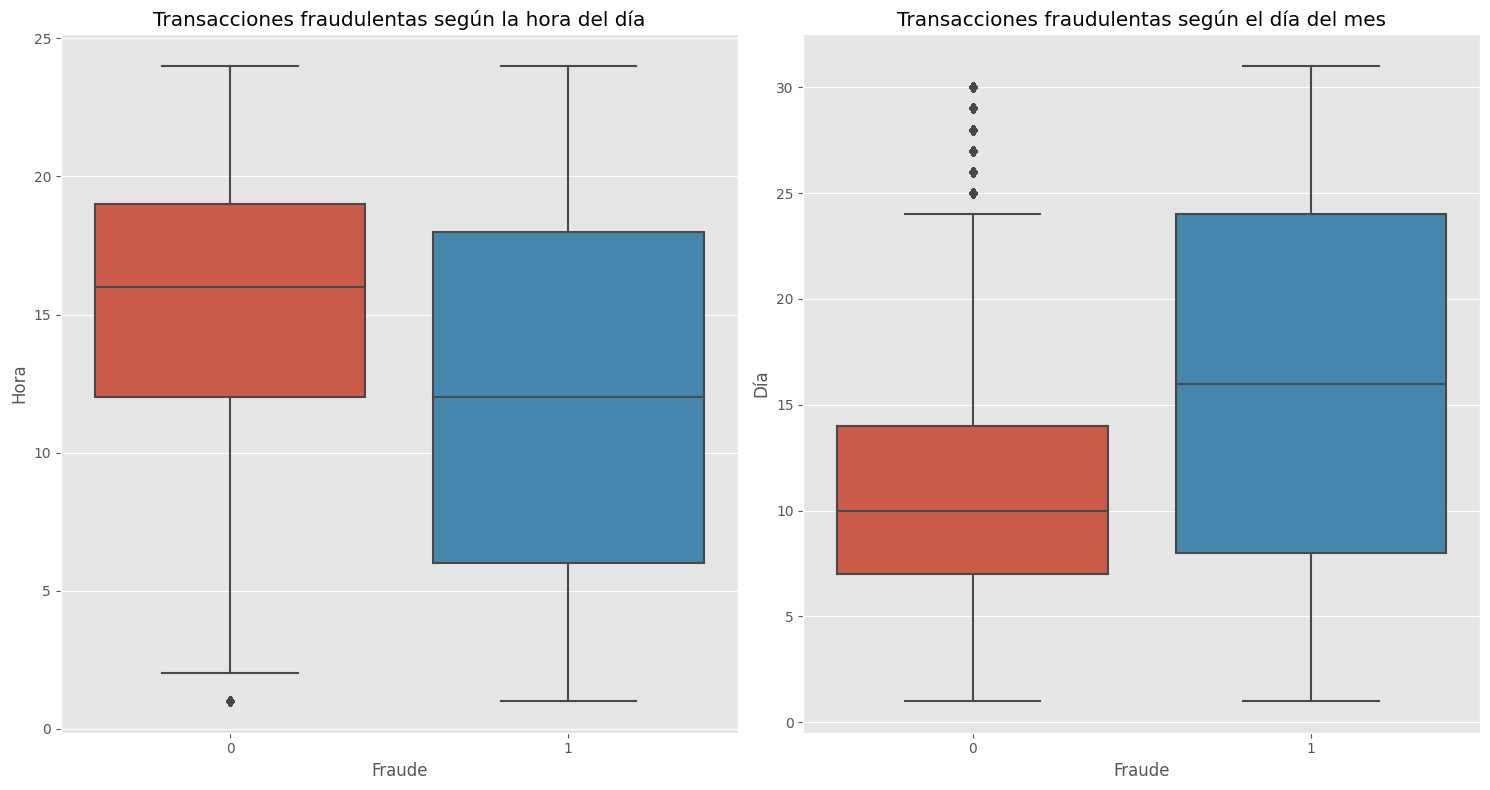

In [ ]:
# Crear una figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15,8))

# Gráfico 1: Transacciones fraudulentas según la hora del día
sns.boxplot(x=df.isfraud, y=df.hour, ax=axes[0])
axes[0].set_title('Transacciones fraudulentas según la hora del día')
axes[0].set_xlabel('Fraude')
axes[0].set_ylabel('Hora')

# Gráfico 2: Transacciones fraudulentas según el día del mes
sns.boxplot(x=df.isfraud, y=df.day, ax=axes[1])
axes[1].set_title('Transacciones fraudulentas según el día del mes')
axes[1].set_xlabel('Fraude')
axes[1].set_ylabel('Día')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show();

- #### Comparación de las transacciones fraudulentas en base a la cantidad de la transacción

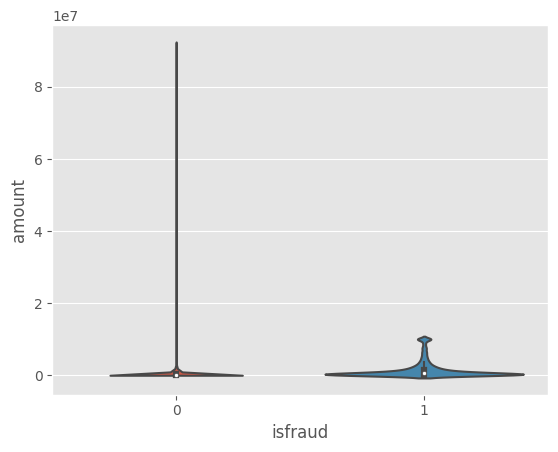

In [ ]:
sns.violinplot(x=df["isfraud"], y=df["amount"])
plt.show();

- #### Tipo de transacción sólo si se confirma el fraude.

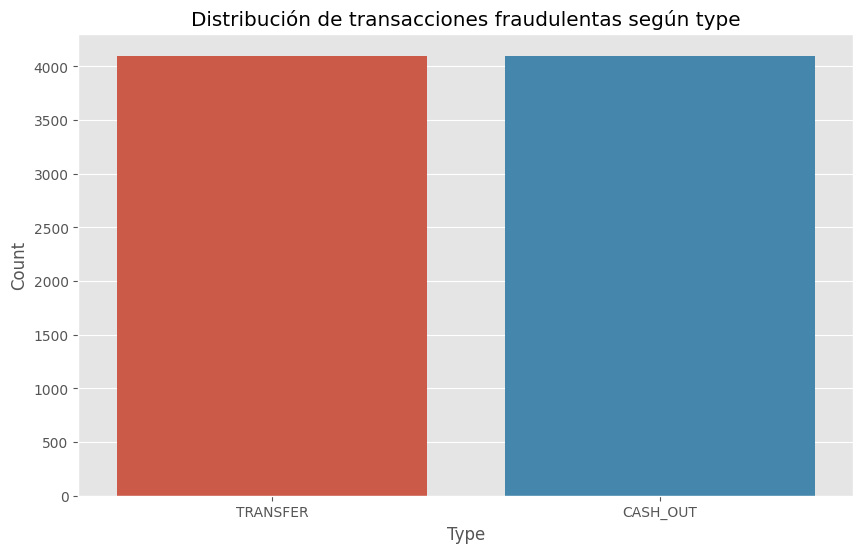

In [ ]:
# Filtrar el DataFrame solo para las filas donde isfraud es igual a 1
df_fraud = df[df['isfraud'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df_fraud)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribución de transacciones fraudulentas según type')
plt.show()

### 3.3 Análisis multivariante

Heatmap

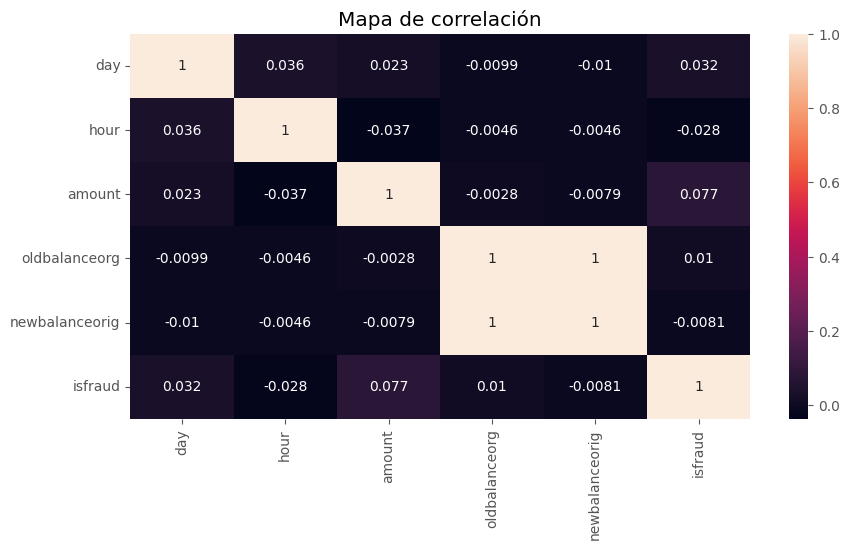

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True,)
plt.title('Mapa de correlación');

Pairplot

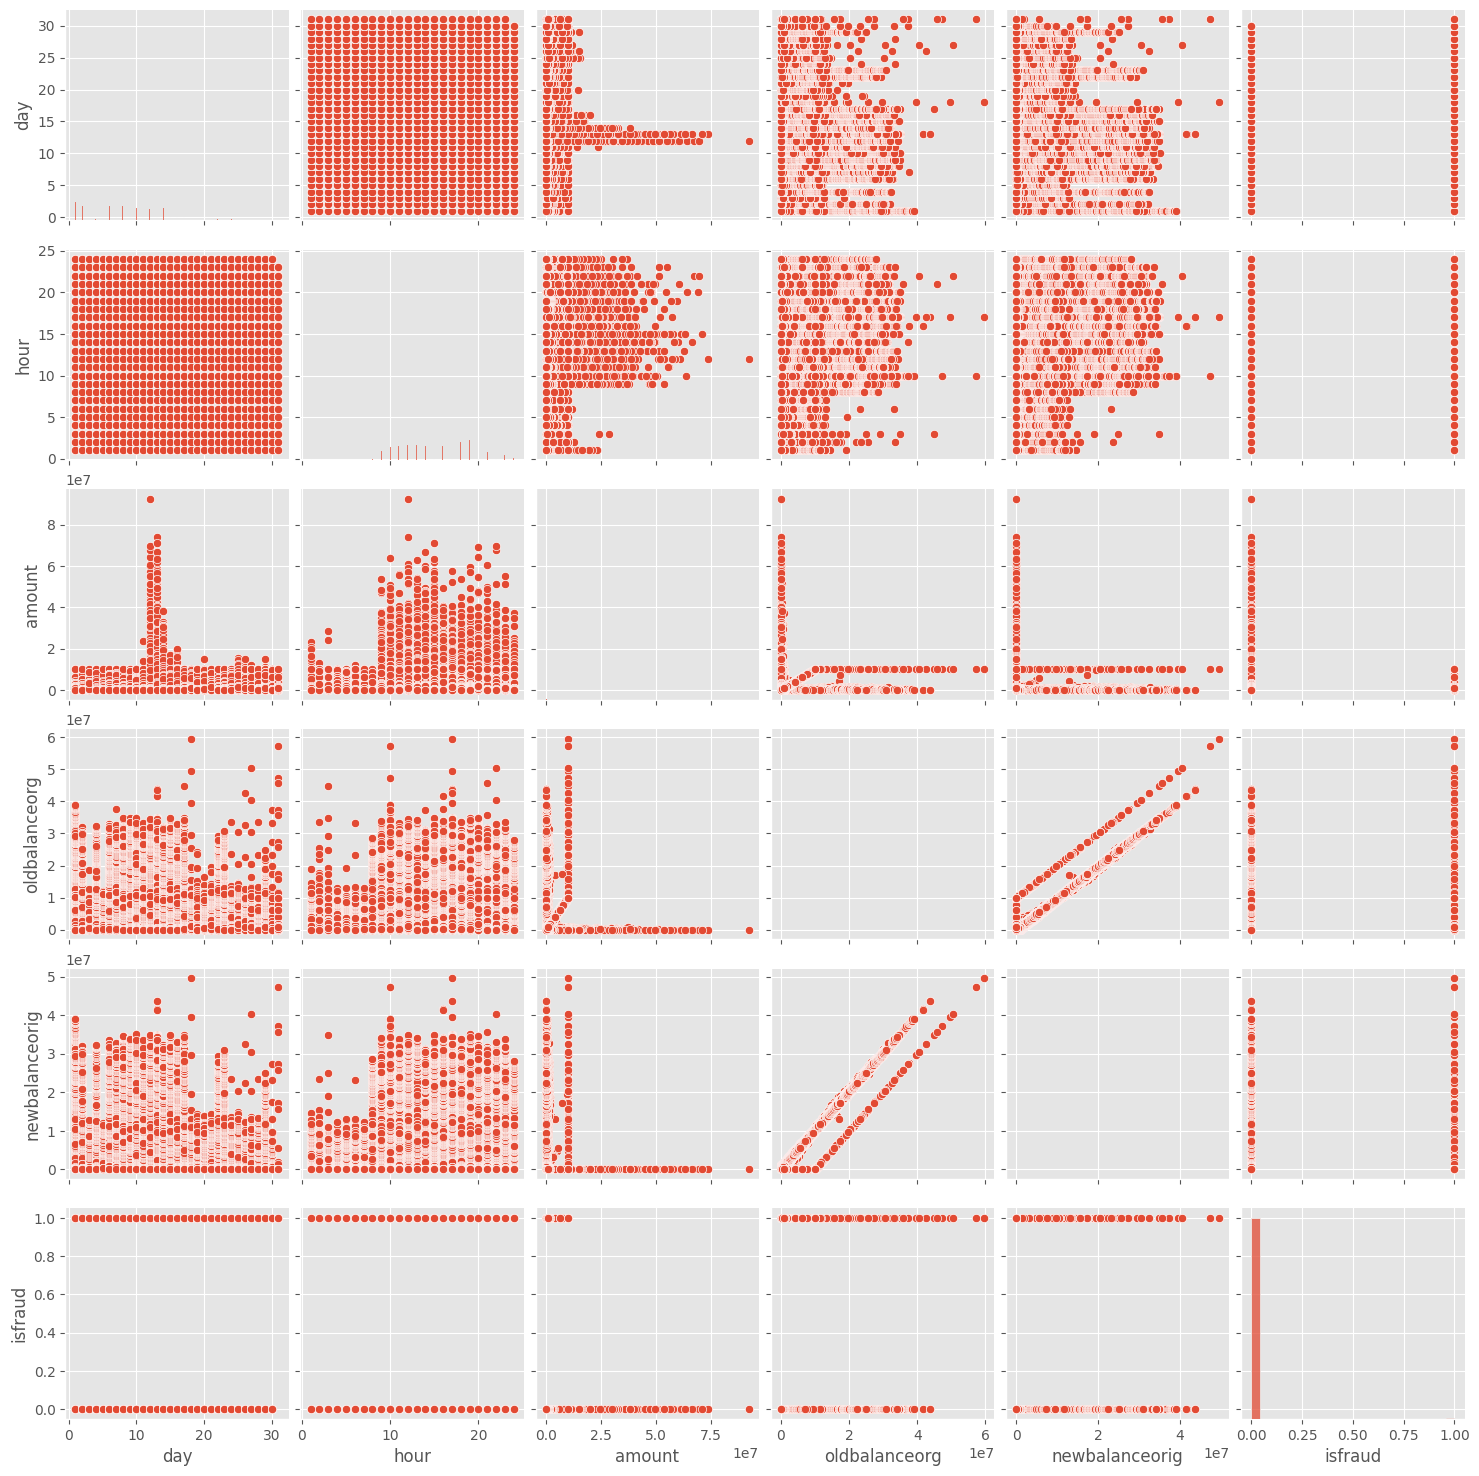

In [ ]:
sns.pairplot(df);

### Conclusiones visualización de datos

En base a la información mostrada en los gráficos anteriores, podemos sacar las siguientes  conclusiones.

- Sólo un 0.1% de las transacciones son fraude.
- Cerca del 70% de las transacciones totales se reparten entre retirada de fondos y pagos. Sin embargo, el las transacciones fraudulentas se reparten entre transferencias y retiradas de fondos.
- En términos generales, los días donde se realizan más transacciones son los 3 primeros días del mes. En cuanto a las horas del día, se registran mayor número de transacciones entre las 6 y las 8 de la tarde. En cuanto a las transacciones fraudulentas, se realizan mayoritariamente entre las 6 de la mañana y las 6 de la tarde, y entre los días 8 y 24 de cada mes.
- El 66% de las transacciones son entre clientes.
- Todas las transacciones fraudulentas tienen importes inferiores a 10 millones.
- Las columnas que representan los balances de las cuantas bantarias están totalmente relacionadas.
- Ninguna de las columnas sigue una distribución normal.

# 4. MACHINE LEARNING


### 4.1 Feature engineering

Primero, vamos a pasar todas las columnas categóricas a numéricas.

In [ ]:
#Hacemos un get dummies de las columnas categóricas
col_cat = df[['type','nameorig', 'namedest']]
pd.get_dummies(col_cat)

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,0,1,1,1,0
3,0,1,0,0,0,1,1,0
4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,0,1,1,0
6362616,0,0,0,0,1,1,1,0
6362617,0,1,0,0,0,1,1,0
6362618,0,0,0,0,1,1,1,0


In [ ]:
# #Lo unimos al dataframe original
df = pd.concat([df, pd.get_dummies(col_cat)], axis=1)

Borramos las columnas categóricas, y las columnas 'oldbalanceorg' y 'newbalanceorig, que demostraron tener una correlación total entre ellas.

In [ ]:
df = df.drop(['type','nameorig', 'namedest', 'oldbalanceorg','newbalanceorig'], axis=1)

De las columnas generadas a partir de la columna 'type', nos quedaremos solamente con las que incluyen transacciones fraudulentas: type_TRANSFER y type_CASH_OUT

In [ ]:
df = df.drop(['type_CASH_IN','type_DEBIT', 'type_PAYMENT'], axis=1)

Guardamos el dataset

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/data_ml.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/data_ml.csv')

### 4.2 Baseline

Teniendo en cuenta las características de nuestro target, los modelos a entrenar serán **de clasificación**.

Debido al tamaño de la muestra, los modelos que entrenaremos serán los siguientes:

- Regresión Logística
- Árbol de decisión
- KNN
- Random Forest
- XGBoost

Se ha decidido no probar el SVM debido a su elevado coste computacional.

Por otra parte, en cuanto a las **métricas**, probaremos las siguientes:

- Accuracy
- Matriz de confusión
- Recall
- F1 Score
- Precision

La métrica que más nos convenga va a depender de los objetivos específicos del sistema de detección de fraude, así como de los costes y las consecuencias de los diferentes tipos de errores. Sin embargo, en general, se va a preferir un **F1 score** alto, ya que equilibra las métricas de precision y recall.

Aún así, se visualizarán todas las métricas nombradas anteriormente.

Dividimos nuestro modelo en test y train y los guardamos en nuevos archivos csv.

In [ ]:
dataset_to_train_test(df,0.1,random_state=42,path_train='/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/training_df.csv',
                      path_test='/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/test_df.csv')

Los conjuntos de entrenamiento y prueba se han guardado exitosamente.


In [ ]:
#Ejecutamos el dataset de train
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/training_df.csv')

In [ ]:
df.head()

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
0,16,20,132254.09,0,1,0,1,1,0
1,7,19,71191.05,0,0,0,1,1,0
2,9,15,871751.20,0,0,1,1,1,0
3,9,11,211557.34,0,0,0,1,1,0
4,15,13,34809.99,0,0,0,1,0,1


Definimos la X e y de  nuestro modelo.

In [ ]:
X = df.drop('isfraud', axis=1)
y = df['isfraud']

Dividimos el dataset en train y validation

In [ ]:
X_train, X_val,y_train, y_val = train_test_split(X,y,random_state=42,test_size=0.1)

Con el dataset dividido, probamos nuestros primeros modelos sin modificaciones.

In [ ]:
nombre_modelo= '_baseline'
y_pred, modelo = probar_modelos_clasificacion(X_train, y_train, X_val, y_val,nombre_modelo=nombre_modelo)

Modelo LogisticRegression__baseline guardado exitosamente.
Modelo: LogisticRegression
Confusion Matrix:
 [[571862     10]
 [   764      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    571872
           1       0.00      0.00      0.00       764

    accuracy                           1.00    572636
   macro avg       0.50      0.50      0.50    572636
weighted avg       1.00      1.00      1.00    572636

------------------------------------
Modelo DecisionTreeClassifier__baseline guardado exitosamente.
Modelo: DecisionTreeClassifier
Confusion Matrix:
 [[571530    342]
 [   382    382]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    571872
           1       0.53      0.50      0.51       764

    accuracy                           1.00    572636
   macro avg       0.76      0.75      0.76    572636
weighted avg       1.00      1.00      1.00    572636

---------------------

Visualizamos estas métricas.

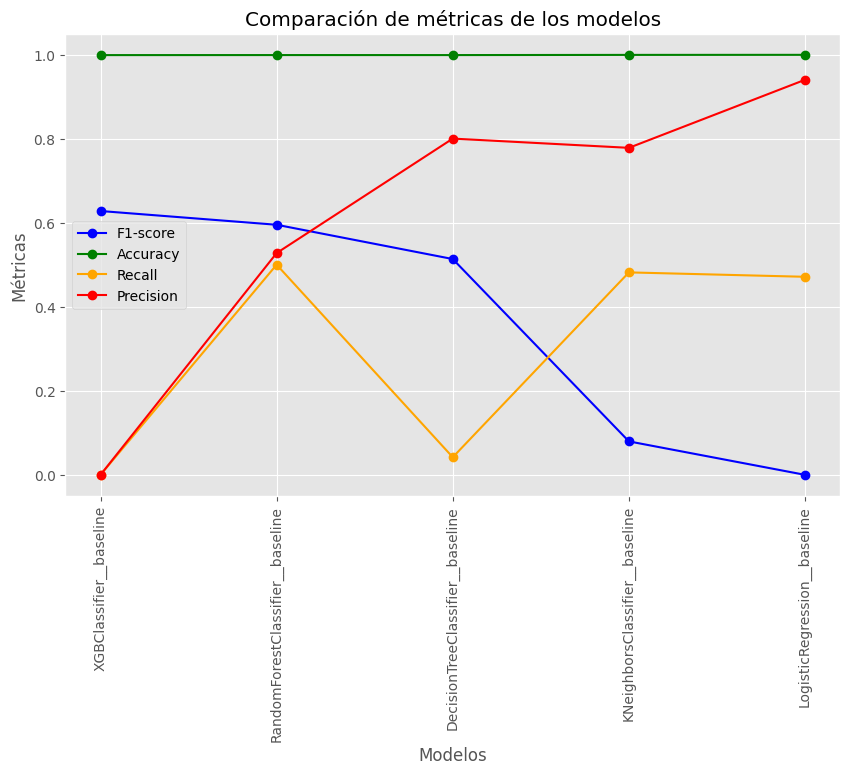

In [ ]:
model_names = ['LogisticRegression__baseline', 'DecisionTreeClassifier__baseline', 'KNeighborsClassifier__baseline',
               'RandomForestClassifier__baseline', 'XGBClassifier__baseline']
comparar_metricas_modelos(model_names, X_val, y_val)


Vamos a intentar mejorar estas métricas.

### 4.3 Feature reduction

Para mejorar las métricas, haremos 3 pasos:

- StandardScaler. Hay columnas que tienen datos que representan millones, y columnas con 0 y 1, por lo que se considera conveniente escalar los datos.
- Balancear el target. Como vimos anteriormente, el target está profundamente desbalanceado.
- PCA, donde esperaremos reducir el número de columnas.


In [ ]:
#Escalado de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

In [ ]:
#Guardamos el Scaler
directorio_modelos = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos"
ruta_scaler = os.path.join(directorio_modelos, 'scaler' + ".pkl")
with open(ruta_scaler, "wb") as file:
      pickle.dump(scaler,file)

In [ ]:
#Balanceo del dataframe
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE para generar nuevas muestras sintéticas
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(scaled_X, y_train)

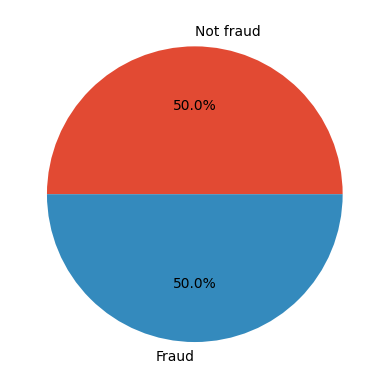

In [ ]:
plt.pie(data=y_balanced,x=y_balanced.value_counts(),labels=['Not fraud','Fraud'],autopct='%1.1f%%');

In [ ]:
#Comprobación del tamaño de la muestra en este punto
print(f'Tamaño X_balanced :{X_balanced.shape}')
print(f'Tamaño y_balanced :{y_balanced.shape}')
print(f'Tamaño scaled_X_val :{scaled_X_val.shape}')
print(f'Tamaño y_val :{y_val.shape}')

Tamaño X_balanced :(10294180, 8)
Tamaño y_balanced :(10294180,)
Tamaño scaled_X_val :(572636, 8)
Tamaño y_val :(572636,)


In [ ]:
#Primero haremos un PCA con todos los componentes, así veremos el peso de cada uno.
pca = PCA(n_components = 8)

pca.fit(X_balanced)

PCA(n_components=8)

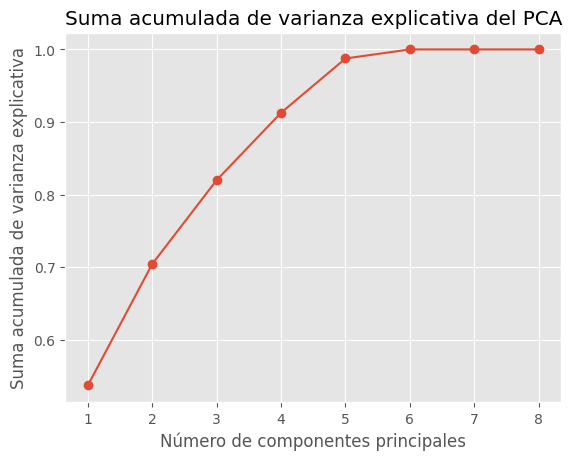

In [ ]:
#Varianza explicativa
exp_var = pca.explained_variance_ratio_

#Varianza acumulada desde PC1
var_acumulada = np.cumsum(exp_var)

#Gráfico que muestra la varianza acumulada
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Suma acumulada de varianza explicativa')
plt.title('Suma acumulada de varianza explicativa del PCA')
plt.show();

3 PC acumulan casi el 80% de la varianza original. Por lo tanto, nos quedaremos con esa cantidad de columnas.

In [ ]:
pca_def =PCA(n_components = 3)
pca_def.fit(X_balanced)

PCA(n_components=3)

Generamos nuestro dataframe con 3 PCA tanto en train como en validation

In [ ]:
X_train = pd.DataFrame(pca_def.transform(X_balanced), columns = ['PC1', 'PC2', 'PC3'])
X_val = pd.DataFrame(pca_def.transform(scaled_X_val), columns=['PC1', 'PC2', 'PC3'])

In [ ]:
#Guardamos este PCA para usarlo posteriormente
directorio_modelos = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos"
ruta_pca = os.path.join(directorio_modelos, 'pca_3' + ".pkl")
with open(ruta_pca, "wb") as file:
      pickle.dump(pca_def,file)

In [ ]:
#Comprobación del tamaño de la muestra en este punto
print(f'Tamaño X_train :{X_train.shape}')
print(f'Tamaño y_balanced :{y_balanced.shape}')
print(f'Tamaño X_val :{X_val.shape}')
print(f'Tamaño y_val :{y_val.shape}')

Tamaño X_train :(10294180, 3)
Tamaño y_balanced :(10294180,)
Tamaño X_val :(572636, 3)
Tamaño y_val :(572636,)


In [ ]:
#Guardamos un CSV con los datos modificados en este punto

# Combinamos train y test por separado para luego guardarlos
train_data = pd.concat([X_train, y_balanced], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)

# Guardamos conjuntos combinados en un archivo CSV
train_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/train_feature_red.csv', index=False)
val_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/val_feature_red.csv', index=False)

Probamos nuevamente los modelos con los datos modificados

In [ ]:
#-----------------------Logistic regression-------------------------
#Definimos modelo
lr=LogisticRegression()

#Entrenamos
lr.fit(X_train, y_balanced)

#Predecimos
y_pred = lr.predict(X_val)

#Mostramos resultados
print(f"Modelo: {type(lr).__name__}")
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Modelo: LogisticRegression
------------------------------------
Confusion Matrix:
 [[497992  73880]
 [   163    601]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    571872
           1       0.01      0.79      0.02       764

    accuracy                           0.87    572636
   macro avg       0.50      0.83      0.47    572636
weighted avg       1.00      0.87      0.93    572636



In [ ]:
#-----------------------------Decision Tree--------------------------
#Definimos modelo
dt=DecisionTreeClassifier()

#Entrenamos
dt.fit(X_train, y_balanced)

#Predecimos
y_pred = dt.predict(X_val)

#Mostramos resultados
print(f"Modelo: {type(dt).__name__}")
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Modelo: DecisionTreeClassifier
------------------------------------
Confusion Matrix:
 [[558235  13637]
 [   322    442]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    571872
           1       0.03      0.58      0.06       764

    accuracy                           0.98    572636
   macro avg       0.52      0.78      0.52    572636
weighted avg       1.00      0.98      0.99    572636



In [ ]:
#---------------------------------------KNN------------------------------------
#Definimos modelo
knn=KNeighborsClassifier()

#Entrenamos
knn.fit(X_train, y_balanced)

#Predecimos
y_pred = knn.predict(X_val)

#Mostramos resultados
print(f"Modelo: {type(knn).__name__}")
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Modelo: KNeighborsClassifier
------------------------------------
Confusion Matrix:
 [[560619  11253]
 [   288    476]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    571872
           1       0.04      0.62      0.08       764

    accuracy                           0.98    572636
   macro avg       0.52      0.80      0.53    572636
weighted avg       1.00      0.98      0.99    572636



In [ ]:
#-----------------------------Random Forest------------------------------
#Definimos modelo
rf=RandomForestClassifier()

#Entrenamos
rf.fit(X_train, y_balanced)

#Predecimos
y_pred = rf.predict(X_val)

#Mostramos resultados
print(f"Modelo: {type(rf).__name__}")
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Modelo: RandomForestClassifier
------------------------------------
Confusion Matrix:
 [[558364  13508]
 [   284    480]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    571872
           1       0.03      0.63      0.07       764

    accuracy                           0.98    572636
   macro avg       0.52      0.80      0.53    572636
weighted avg       1.00      0.98      0.99    572636



In [ ]:
#-----------------------------XGBoost------------------------------
#Definimos modelo
xgb= xgboost.XGBClassifier(random_state=42)

#Entrenamos
xgb.fit(X_train, y_balanced)

#Predecimos
y_pred = xgb.predict(X_val)

#Mostramos resultados
print(f"Modelo: {type(xgb).__name__}")
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Modelo: XGBClassifier
------------------------------------
Confusion Matrix:
 [[519352  52520]
 [   113    651]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    571872
           1       0.01      0.85      0.02       764

    accuracy                           0.91    572636
   macro avg       0.51      0.88      0.49    572636
weighted avg       1.00      0.91      0.95    572636



Vemos que las métricas empeoran notablemente.

#### 4.3.1 Prueba 1

Vamos a probar a "balancear" los datos de forma distinta para disminuir el coste computacional de cara al GridSearch que realizaremos posteriormente. Probaremos a crearnos un dataset reducido donde incluyamos todas las transacciones fraudulentas del dataset original. Asimismo, añadiremos la misma cantidad de transacciones no fraudulentas. Finalmente, mezclaremos las transacciones para desordenarlas. Así, conseguimos un balanceo del 50/50 de una forma "manual".

In [ ]:
#Ejecutamos  nuevamente el dataset de train
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/training_df.csv')

In [ ]:
#Verificamos la cantidad de transacciones fraudulentas.
df_fraud = df.loc[df['isfraud'] == 1]
df_fraud

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
456,22,10,713404.60,1,0,1,1,1,0
570,13,6,219110.27,1,1,0,1,1,0
885,16,19,2983996.60,1,1,0,1,1,0
1227,4,10,987591.59,1,0,1,1,1,0
2143,30,15,219407.52,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
5721248,31,8,3846781.01,1,1,0,1,1,0
5722406,6,15,515645.16,1,1,0,1,1,0
5722500,23,18,105097.16,1,0,1,1,1,0
5723459,20,5,873356.47,1,0,1,1,1,0


In [ ]:
#Seleccionamos la misma cantidad de transacciones no fraudulentas.
df_non_fraud = df.loc[df['isfraud']==0].iloc[:7396,:]
df_non_fraud

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
0,16,20,132254.09,0,1,0,1,1,0
1,7,19,71191.05,0,0,0,1,1,0
2,9,15,871751.20,0,0,1,1,1,0
3,9,11,211557.34,0,0,0,1,1,0
4,15,13,34809.99,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
7400,13,13,43104.57,0,0,0,1,0,1
7401,13,13,2794.46,0,0,0,1,0,1
7402,7,10,21805.45,0,0,0,1,0,1
7403,17,13,86426.23,0,0,0,1,1,0


In [ ]:
#Los unimos para crear nuestro dataset reducido
df_red= pd.concat([df_fraud, df_non_fraud], ignore_index=True)

In [ ]:
#Vemos los datos de describe e info
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14792 entries, 0 to 14791
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            14792 non-null  int64  
 1   hour           14792 non-null  int64  
 2   amount         14792 non-null  float64
 3   isfraud        14792 non-null  int64  
 4   type_CASH_OUT  14792 non-null  int64  
 5   type_TRANSFER  14792 non-null  int64  
 6   nameorig_C     14792 non-null  int64  
 7   namedest_C     14792 non-null  int64  
 8   namedest_M     14792 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.0 MB


In [ ]:
df_red.describe()

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
count,14792.000000,14792.000000,1.479200e+04,14792.000000,14792.000000,14792.000000,14792.0,14792.000000,14792.000000
mean,13.152042,14.021228,8.351613e+05,0.500000,0.428745,0.292185,1.0,0.834438,0.165562
std,8.071460,5.871413,1.879891e+06,0.500017,0.494913,0.454782,0.0,0.371700,0.371700
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,7.000000,10.000000,3.855358e+04,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
50%,12.000000,15.000000,1.754326e+05,0.500000,0.000000,0.000000,1.0,1.000000,0.000000
75%,17.000000,19.000000,5.419415e+05,1.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,31.000000,24.000000,1.605698e+07,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [ ]:
#Mezclamos las transacciones para desordenarlas
df_red = shuffle(df_red)
df_red.reset_index(inplace=True, drop=True)

In [ ]:
#Comprobamos que están mezcladas
df_red.head(10)

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
0,10,16,19592.03,0,0,1,1,1,0
1,7,22,10153.75,0,0,0,1,0,1
2,12,22,132943.98,1,1,0,1,1,0
3,6,5,144065.75,1,1,0,1,1,0
4,6,17,417217.89,1,0,1,1,1,0
5,16,19,12580.23,0,0,0,1,0,1
6,6,13,212130.67,1,0,1,1,1,0
7,13,14,14310.00,0,0,0,1,0,1
8,11,4,4448598.93,1,0,1,1,1,0
9,30,18,69724.85,1,0,1,1,1,0


In [ ]:
#Guardamos el csv y lo llamamos posteriormente
df_red.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/df_red50_train_pca3.csv', index = False)

In [ ]:
df_red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/df_red50_train_pca3.csv')

Ahora vamos a realizarle las mismas tranformaciones que al dataset original (excepto el balanceo, que lo hemos hecho manualmente).

In [ ]:
#Definimos X e y
X = df_red.drop('isfraud', axis=1)
y = df_red['isfraud']

#Dividimos en train y validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Comprobación del tamaño de la muestra en este punto
print(f'Tamaño X_train :{X_train.shape}')
print(f'Tamaño y_train :{y_train.shape}')
print(f'Tamaño X_val :{X_val.shape}')
print(f'Tamaño y_val :{y_val.shape}')

Tamaño X_train :(11833, 8)
Tamaño y_train :(11833,)
Tamaño X_val :(2959, 8)
Tamaño y_val :(2959,)


In [ ]:
#Importamos el Scaler y el PCA
ruta_pca = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/pca_3.pkl'
ruta_scaler = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/scaler.pkl'

#Escalamos datos
scaler = pickle.load(open(ruta_scaler, 'rb'))
scaled_x_train = scaler.transform(X_train)
scaled_x_val = scaler.transform(X_val)

#Hacemos PCA = 3
pca = pickle.load(open(ruta_pca, 'rb'))
pca.fit(scaled_x_train)

X_train_pca = pd.DataFrame(pca.transform(scaled_x_train), columns = ['PC1', 'PC2', 'PC3'])
X_val_pca = pd.DataFrame(pca.transform(scaled_x_val), columns=['PC1', 'PC2', 'PC3'])


In [ ]:
#Comprobación del tamaño de la muestra en este punto
print(f'Tamaño X_train_pca :{X_train_pca.shape}')
print(f'Tamaño y_train :{y_train.shape}')
print(f'Tamaño X_val_pca :{X_val_pca.shape}')
print(f'Tamaño y_val :{y_val.shape}')

Tamaño X_train_pca :(11833, 3)
Tamaño y_train :(11833,)
Tamaño X_val_pca :(2959, 3)
Tamaño y_val :(2959,)


Con estos datos, probamos nuevamente los modelos.

In [ ]:
nombre_modelo= 'prueba_1'
probar_modelos_clasificacion(X_train_pca, y_train, X_val_pca, y_val,nombre_modelo=nombre_modelo)


Modelo LogisticRegression_prueba_1 guardado exitosamente.
Modelo: LogisticRegression
Confusion Matrix:
 [[1288  192]
 [ 324 1155]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1480
           1       0.86      0.78      0.82      1479

    accuracy                           0.83      2959
   macro avg       0.83      0.83      0.83      2959
weighted avg       0.83      0.83      0.83      2959

------------------------------------
Modelo DecisionTreeClassifier_prueba_1 guardado exitosamente.
Modelo: DecisionTreeClassifier
Confusion Matrix:
 [[1270  210]
 [ 227 1252]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1480
           1       0.86      0.85      0.85      1479

    accuracy                           0.85      2959
   macro avg       0.85      0.85      0.85      2959
weighted avg       0.85      0.85      0.85      2959

------------------------------------
Mo

(array([0, 1, 1, ..., 0, 1, 1]),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, ...))

El f1-score mejora muchísimo, como podemos ver:

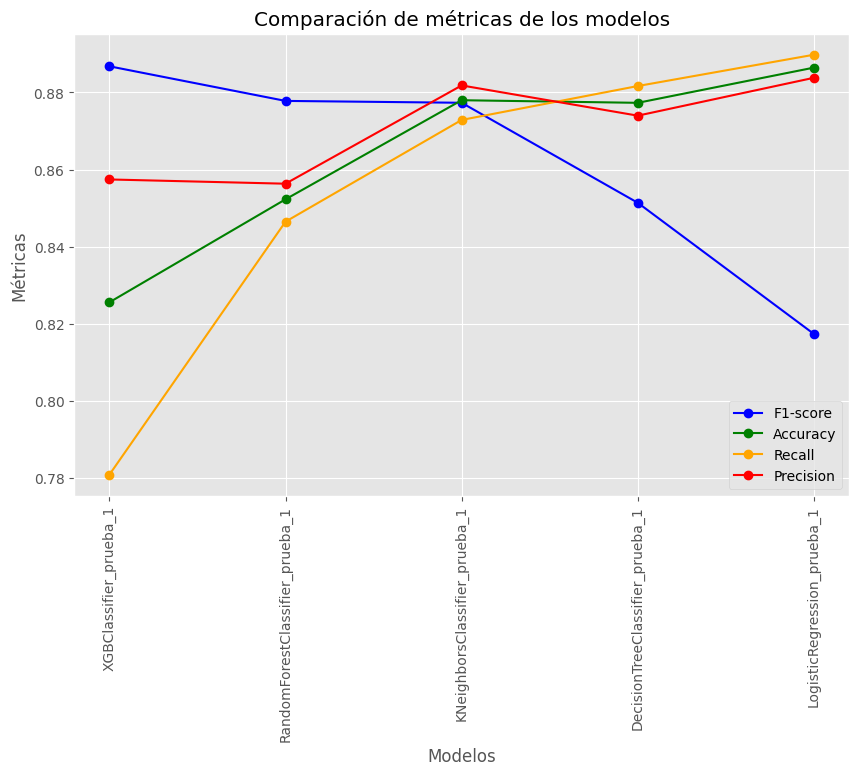

In [ ]:
model_names = ['LogisticRegression_prueba_1', 'DecisionTreeClassifier_prueba_1', 'KNeighborsClassifier_prueba_1',
               'RandomForestClassifier_prueba_1', 'XGBClassifier_prueba_1']
comparar_metricas_modelos(model_names, X_val_pca, y_val)


## 4.4 Grid Search

Intentaremos mejorar las métricas de cada uno de los modelos. Para ello, vamos a buscar sus mejores hiperparámetros mediante un GridSearch, especificando como scoring el f1-score.

Además, guardaremos estos modelos.

### 4.1 Logistic Regression

In [ ]:
params_grid_lr = dict()
params_grid_lr['solver'] = ['lbfgs', 'saga']
params_grid_lr['penalty'] = ['l1', 'l2', 'elasticnet']
params_grid_lr['C'] = [0.01, 0.1, 1]

lr = LogisticRegression()
gridsearch_lr = GridSearchCV(lr, params_grid_lr, scoring='f1', n_jobs=-1, cv=5)
gridsearch_lr.fit(X_train_pca, y_train)

# Guardamos el modelo gridsearch_lr en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_lr1.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_lr, f)


In [ ]:
gridsearch_lr.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

### 4.2 Decision Tree

In [ ]:
param_grid_tree = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [1.0, 'sqrt', 'log2']
}

tree = DecisionTreeClassifier()
gridsearch_tree = GridSearchCV(tree, param_grid_tree, scoring='f1', n_jobs=-1, cv=5)
gridsearch_tree.fit(X_train_pca, y_train)

# Guardamos el modelo gridsearch_tree en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_tree1.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_tree, f)

In [ ]:
gridsearch_tree.best_params_

{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 10}

### 4.3 KNN

In [ ]:
param_grid_knn = {
    'n_neighbors':list(range(2,10)),
    'weights': ['uniform','distance']
}

knn = KNeighborsClassifier()
gridsearch_knn = GridSearchCV(knn, param_grid_knn, scoring='f1', n_jobs=-1, cv=5)
gridsearch_knn.fit(X_train_pca, y_train)

# Guardamos el modelo gridsearch_knn en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_knn1.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_knn, f)

In [ ]:
gridsearch_knn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

### 4.4 Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators'  : [90,100,115,130],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
}

rf = RandomForestClassifier()
gridsearch_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', n_jobs=-1, cv=5)
gridsearch_rf.fit(X_train_pca, y_train)

# Guardamos el modelo gridsearch_rf en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_rf1.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_rf, f)

In [ ]:
gridsearch_rf.best_params_

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

### 4.5 XGBoost

In [ ]:
param_grid_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xgb = xgboost.XGBClassifier()
gridsearch_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='f1', n_jobs=-1, cv=5)
gridsearch_xgb.fit(X_train_pca, y_train)

# Guardamos el modelo gridsearch_xgb en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_xgb1.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_xgb, f)

In [ ]:
gridsearch_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 180}

## 4.5 Probando modelos finales

Una vez tenemos los mejores parámetros recomendados por GridSearch, volvemos a ejecutar nuestros modelos con los hiperparámetros.

In [ ]:
#Guardamos los mejores hiperparámetros del gridsearch anterior
grid_params  = {'lr':gridsearch_lr.best_params_,
         'tree' : gridsearch_tree.best_params_,
         'knn' : gridsearch_knn.best_params_,
         'rf' : gridsearch_rf.best_params_,
         'xgb' : gridsearch_xgb.best_params_
        }

In [ ]:
nombre_modelo= 'grid1'
probar_modelos_grid(X_train_pca, y_train, X_val_pca, y_val, nombre_modelo = nombre_modelo)

Modelo LogisticRegression_grid1 guardado exitosamente.
Modelo: LogisticRegression
Confusion Matrix:
 [[1288  192]
 [ 324 1155]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1480
           1       0.86      0.78      0.82      1479

    accuracy                           0.83      2959
   macro avg       0.83      0.83      0.83      2959
weighted avg       0.83      0.83      0.83      2959

------------------------------------
Modelo DecisionTreeClassifier_grid1 guardado exitosamente.
Modelo: DecisionTreeClassifier
Confusion Matrix:
 [[1318  162]
 [ 243 1236]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1480
           1       0.88      0.84      0.86      1479

    accuracy                           0.86      2959
   macro avg       0.86      0.86      0.86      2959
weighted avg       0.86      0.86      0.86      2959

------------------------------------
Modelo K

(array([0, 1, 1, ..., 0, 1, 1]),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=180, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...))

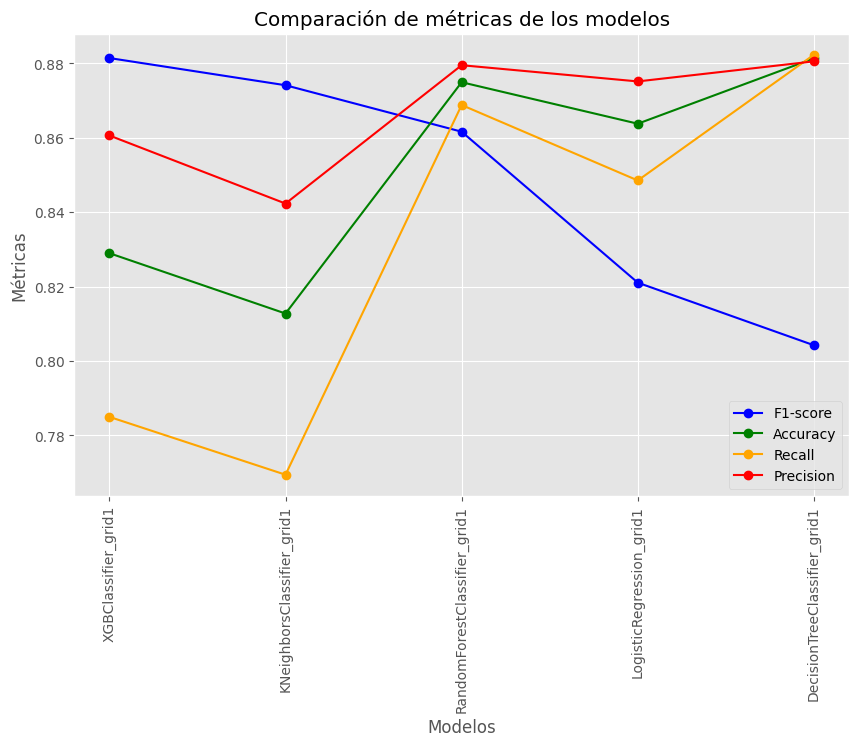

In [ ]:
model_names = ['LogisticRegression_grid1', 'DecisionTreeClassifier_grid1', 'KNeighborsClassifier_grid1',
               'RandomForestClassifier_grid1', 'XGBClassifier_grid1']
comparar_metricas_modelos(model_names, X_val_pca, y_val)

En este momento, tenemos 3 modelos guardados:

- Modelo_baseline: sin modificaciones.
- Modelo_prueba1. Balanceado manual 50/50, escalado y PCA=3.
- Modelo_grid1. Balanceado manual 50/50, escalado y PCA=3.GridSearch con scoring='f1'.

Ahora vamos a generar una gráfica que nos muestre cuál es el modelo con el mejor f1-score de los que tenemos hasta ahora. No vamos a incluir los modelos del baseline, ya que no están escalados. Se considera que sus métricas no son realistas.

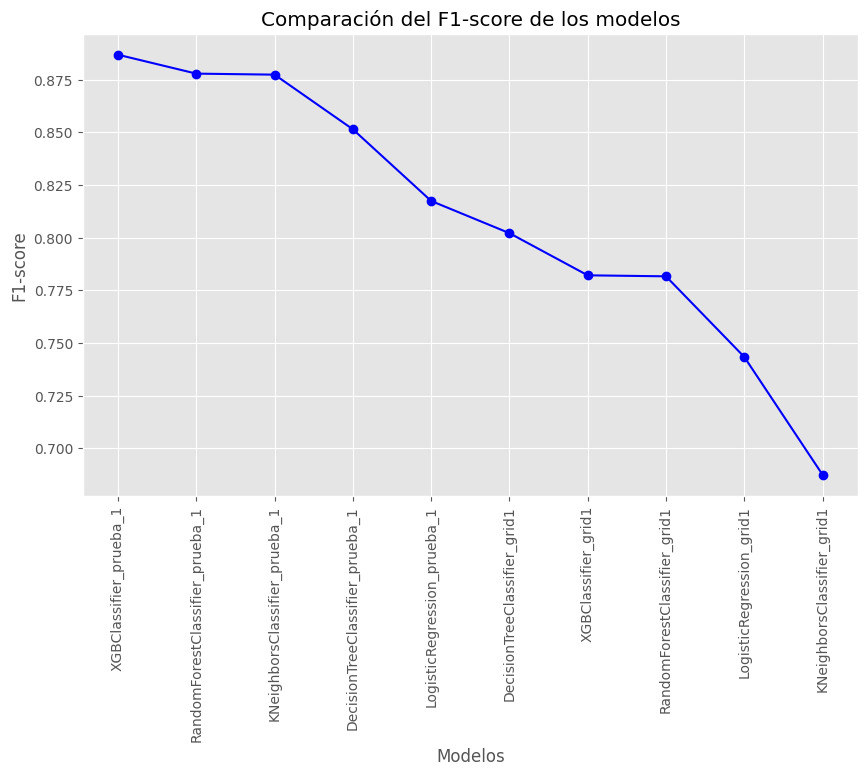

In [ ]:
#Lista con nombre de modelos
model_names = [ 'LogisticRegression_prueba_1', 'DecisionTreeClassifier_prueba_1',
               'KNeighborsClassifier_prueba_1', 'RandomForestClassifier_prueba_1',
                'XGBClassifier_prueba_1', 'LogisticRegression_grid1', 'DecisionTreeClassifier_grid1',
               'KNeighborsClassifier_grid1', 'RandomForestClassifier_grid1',
                'XGBClassifier_grid1']
# Listas vacías para almacenar los valores de F1-score y los nombres de los modelos
f1_scores = []
sorted_model_names = []

# Cargamos los modelos desde los archivos pickle y calculamos el F1-score
for model_name in model_names:
    file_path = f'/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/{model_name}.pkl'
    with open(file_path, 'rb') as f:
        model = pickle.load(f)
    y_pred = model.predict(X_val_pca)
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)
    sorted_model_names.append(model_name)

# Ordenamos los F1-scores
f1_scores, sorted_model_names = zip(*sorted(zip(f1_scores, sorted_model_names), reverse=True))

# Datos estéticos de la gráfica
line_styles = ['-'] * len(sorted_model_names)
plt.figure(figsize=(10, 6))
plt.xticks(range(len(sorted_model_names)), sorted_model_names, rotation=90)

# Creamos la gráfica
plt.plot(f1_scores, label='F1-score', color='blue', linestyle='-', marker='o')

# Títulos
plt.title('Comparación del F1-score de los modelos')
plt.xlabel('Modelos')
plt.ylabel('F1-score')
plt.show();

### 4.5.1 Probando con test

Vemos que el mejor modelo hasta ahora es el Random Forest con los hiperparámetros por defecto. Sin embargo, ¿es capaz de mantener el f1-score en presencia de nuevos datos?

In [ ]:
#Abrimos nuestro csv con datos de test que separamos al principio.
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/test_df.csv')

In [ ]:
#Vemos la información de test
df_test.head()

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
0,12,14,330218.42,0,0,0,1,1,0
1,1,15,11647.08,0,0,0,1,0,1
2,1,10,152264.21,0,0,0,1,1,0
3,17,19,1551760.63,0,0,1,1,1,0
4,9,14,78172.30,0,0,0,1,1,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            636262 non-null  int64  
 1   hour           636262 non-null  int64  
 2   amount         636262 non-null  float64
 3   isfraud        636262 non-null  int64  
 4   type_CASH_OUT  636262 non-null  int64  
 5   type_TRANSFER  636262 non-null  int64  
 6   nameorig_C     636262 non-null  int64  
 7   namedest_C     636262 non-null  int64  
 8   namedest_M     636262 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 43.7 MB


In [ ]:
df_test.describe()

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
count,636262.000000,636262.000000,6.362620e+05,636262.000000,636262.000000,636262.000000,636262.0,636262.000000,636262.000000
mean,10.497537,15.586441,1.810421e+05,0.001284,0.351567,0.083997,1.0,0.661551,0.338449
std,5.928435,4.094571,6.136867e+05,0.035811,0.477460,0.277383,0.0,0.473182,0.473182
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,7.000000,12.000000,1.336292e+04,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,10.000000,16.000000,7.494935e+04,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,14.000000,19.000000,2.094772e+05,0.000000,1.000000,0.000000,1.0,1.000000,1.000000
max,31.000000,24.000000,6.933732e+07,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [ ]:
#Definimos X e y
X_test = df_test.drop('isfraud', axis=1)
y_test = df_test['isfraud']

In [ ]:
#Comprobamos cómo de desbalanceado está el target
y_test.value_counts()

0    635445
1       817
Name: isfraud, dtype: int64

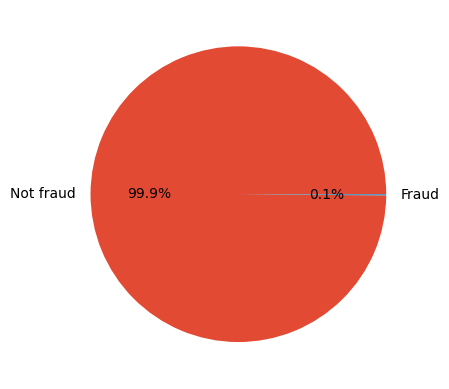

In [ ]:
plt.pie(data=y_test,x=y_test.value_counts(),labels=['Not fraud','Fraud'],autopct='%1.1f%%');

In [ ]:
#Verificamos el tamaño de la muestra hasta ahora:
print(f'Tamaño X_train_pca :{X_train_pca.shape}')
print(f'Tamaño y_train :{y_train.shape}')
print(f'Tamaño X_test :{X_test.shape}')
print(f'Tamaño y_test :{y_test.shape}')

Tamaño X_train_pca :(11833, 3)
Tamaño y_train :(11833,)
Tamaño X_test :(636262, 8)
Tamaño y_test :(636262,)


In [ ]:
#Realizamos las transformaciones en test
#Cargamos el PCA y el scaler
ruta_pca = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/pca_3.pkl'
ruta_scaler = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/scaler.pkl'

In [ ]:
#Escalamos
scaler = pickle.load(open(ruta_scaler, 'rb'))
scaled_X_test = scaler.transform(X_test)

#PCA

pca = pickle.load(open(ruta_pca, 'rb'))
X_test_pca = pd.DataFrame(pca.transform(scaled_X_test), columns=['PC1', 'PC2', 'PC3'])

In [ ]:
#Probamos con el mejor modelo
model_top1 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/DecisionTreeClassifier_grid1.pkl','rb'))
y_pred = model_top1.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    635445
           1       0.01      0.80      0.01       817

    accuracy                           0.85    636262
   macro avg       0.50      0.83      0.47    636262
weighted avg       1.00      0.85      0.92    636262

[[542702  92743]
 [   166    651]]


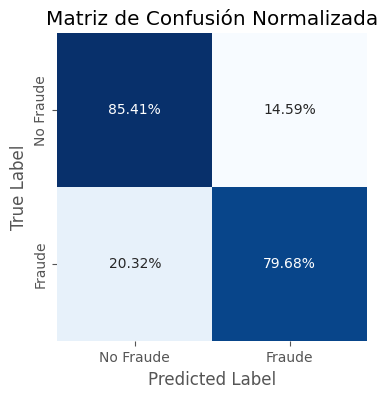

In [ ]:
#Visualización matriz confusión
conf_test=confusion_matrix(y_test, y_pred)
class_names = ['No Fraude', 'Fraude']
plot_confusion_matrix(conf_test, class_names, normalize=True)

Sigamos haciendo pruebas

### 4.5.2 Prueba 2

Para tratar de mejorar la métrica, intentaremos balancear manualmente los datos de train, pero con una proporción 70/30.


In [ ]:
#Ejecutamos  nuevamente el dataset de train
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/training_df.csv')
#Verificamos la cantidad de transacciones fraudulentas.
df_fraud = df.loc[df['isfraud'] == 1]
df_fraud

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
456,22,10,713404.60,1,0,1,1,1,0
570,13,6,219110.27,1,1,0,1,1,0
885,16,19,2983996.60,1,1,0,1,1,0
1227,4,10,987591.59,1,0,1,1,1,0
2143,30,15,219407.52,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
5721248,31,8,3846781.01,1,1,0,1,1,0
5722406,6,15,515645.16,1,1,0,1,1,0
5722500,23,18,105097.16,1,0,1,1,1,0
5723459,20,5,873356.47,1,0,1,1,1,0


In [ ]:
#Seleccionamos la cantidad de transacciones no fraudulentas para ajustarnos a la proporción 70/30
df_non_fraud = df.loc[df['isfraud']==0].iloc[:24633,:]
df_non_fraud

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
0,16,20,132254.09,0,1,0,1,1,0
1,7,19,71191.05,0,0,0,1,1,0
2,9,15,871751.20,0,0,1,1,1,0
3,9,11,211557.34,0,0,0,1,1,0
4,15,13,34809.99,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
24658,18,15,75946.70,0,0,0,1,1,0
24659,17,13,414346.44,0,1,0,1,1,0
24660,14,17,17830.85,0,1,0,1,1,0
24661,11,10,44904.22,0,0,0,1,0,1


In [ ]:
#Los unimos para crear nuestro dataset reducido
df_red7030= pd.concat([df_fraud, df_non_fraud], ignore_index=True)
#Mezclamos las transacciones para desordenarlas
df_red7030 = shuffle(df_red7030)
df_red7030.reset_index(inplace=True, drop=True)

In [ ]:
#Comprobamos que están mezcladas
df_red7030.head(10)

,day,hour,amount,isfraud,type_CASH_OUT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
0,12,8,5141769.94,1,0,1,1,1,0
1,8,13,343611.26,0,1,0,1,1,0
2,1,11,2100.00,1,0,1,1,1,0
3,19,20,1138384.29,1,1,0,1,1,0
4,29,16,7726.90,0,0,0,1,0,1
5,4,20,19742.71,1,0,1,1,1,0
6,13,19,162359.38,0,1,0,1,1,0
7,6,23,155854.37,1,1,0,1,1,0
8,13,3,30820.17,1,0,1,1,1,0
9,12,11,49623.02,0,1,0,1,1,0


In [ ]:
#Guardamos el csv y lo llamamos posteriormente
df_red7030.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/df_red70_train_pca3.csv', index = False)

In [ ]:
df_red7030 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/df_red70_train_pca3.csv')

In [ ]:
#Definimos X e y
X = df_red7030.drop('isfraud', axis=1)
y = df_red7030['isfraud']

#Dividimos en train y validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Comprobación del tamaño de la muestra en este punto
print(f'Tamaño X_train :{X_train.shape}')
print(f'Tamaño y_train :{y_train.shape}')
print(f'Tamaño X_val :{X_val.shape}')
print(f'Tamaño y_val :{y_val.shape}')

Tamaño X_train :(25623, 8)
Tamaño y_train :(25623,)
Tamaño X_val :(6406, 8)
Tamaño y_val :(6406,)


In [ ]:
#Importamos el Scaler y el PCA
ruta_pca = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/pca_3.pkl'
ruta_scaler = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/scaler.pkl'

#Escalamos datos
scaler = pickle.load(open(ruta_scaler, 'rb'))
scaled_x_val = scaler.transform(X_val)
scaled_x_train = scaler.transform(X_train)

#Hacemos PCA = 3
pca = pickle.load(open(ruta_pca, 'rb'))
pca.fit(scaled_x_train)

X_train_pca = pd.DataFrame(pca.transform(scaled_x_train), columns = ['PC1', 'PC2', 'PC3'])
X_val_pca = pd.DataFrame(pca.transform(scaled_x_val), columns=['PC1', 'PC2', 'PC3'])


In [ ]:
#Comprobación del tamaño de la muestra en este punto
print(f'Tamaño X_train_pca :{X_train_pca.shape}')
print(f'Tamaño y_train :{y_train.shape}')
print(f'Tamaño X_val_pca :{X_val_pca.shape}')
print(f'Tamaño y_val :{y_val.shape}')

Tamaño X_train_pca :(25623, 3)
Tamaño y_train :(25623,)
Tamaño X_val_pca :(6406, 3)
Tamaño y_val :(6406,)


In [ ]:
#Lo probamos con todos los modelos
nombre_modelo= 'prueba_2'
probar_modelos_clasificacion(X_train_pca, y_train, X_val_pca, y_val,nombre_modelo=nombre_modelo)


Modelo LogisticRegression_prueba_2 guardado exitosamente.
Modelo: LogisticRegression
Confusion Matrix:
 [[4669  213]
 [ 580  944]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4882
           1       0.82      0.62      0.70      1524

    accuracy                           0.88      6406
   macro avg       0.85      0.79      0.81      6406
weighted avg       0.87      0.88      0.87      6406

------------------------------------
Modelo DecisionTreeClassifier_prueba_2 guardado exitosamente.
Modelo: DecisionTreeClassifier
Confusion Matrix:
 [[4519  363]
 [ 375 1149]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4882
           1       0.76      0.75      0.76      1524

    accuracy                           0.88      6406
   macro avg       0.84      0.84      0.84      6406
weighted avg       0.88      0.88      0.88      6406

------------------------------------
Mo

(array([0, 0, 0, ..., 0, 0, 0]),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, ...))

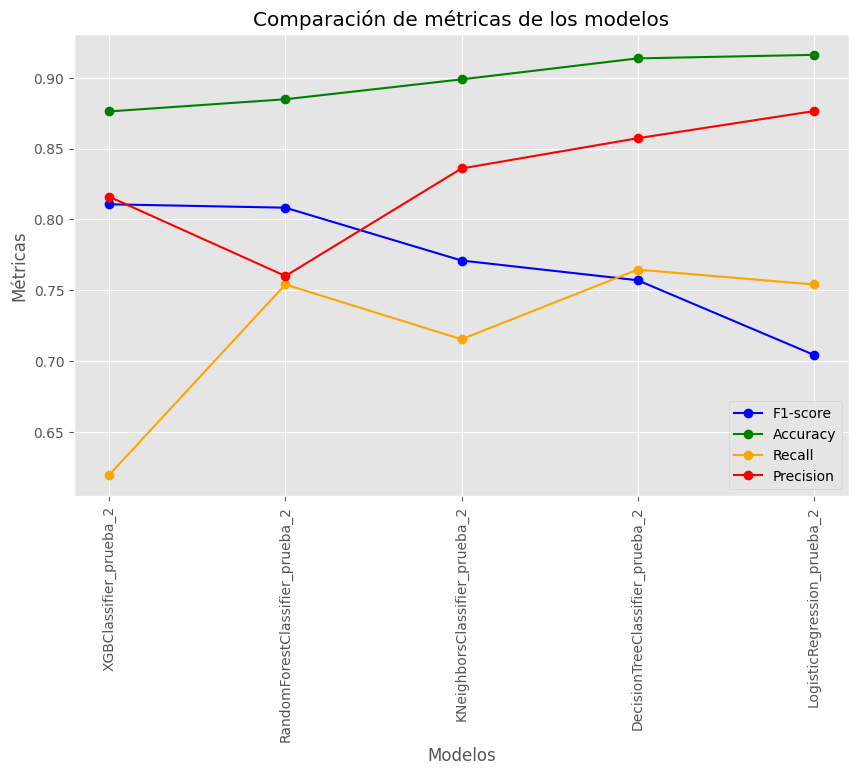

In [ ]:
#Graficamos resultados
model_names = ['LogisticRegression_prueba_2', 'DecisionTreeClassifier_prueba_2', 'KNeighborsClassifier_prueba_2',
               'RandomForestClassifier_prueba_2', 'XGBClassifier_prueba_2']
comparar_metricas_modelos(model_names, X_val_pca, y_val)


#### Test

Testeamos con el mejor modelo de la gráfica anterior.

In [ ]:
#Abrimos nuestro csv con datos de test que separamos al principio.
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/test_df.csv')

In [ ]:
#Definimos X e y
X_test = df_test.drop('isfraud', axis=1)
y_test = df_test['isfraud']

#Realizamos las transformaciones en test
#Cargamos el PCA y el scaler
ruta_pca = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/pca_3.pkl'
ruta_scaler = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/scaler.pkl'

#Escalamos
scaler = pickle.load(open(ruta_scaler, 'rb'))
scaled_X_test = scaler.transform(X_test)

#PCA

pca = pickle.load(open(ruta_pca, 'rb'))
X_test_pca = pd.DataFrame(pca.transform(scaled_X_test), columns=['PC1', 'PC2', 'PC3'])

In [ ]:
#Probamos el mejor modelo de la prueba anterior
model_top2 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/LogisticRegression_prueba_2.pkl','rb'))
y_pred = model_top2.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    635445
           1       0.01      0.54      0.02       817

    accuracy                           0.92    636262
   macro avg       0.50      0.73      0.49    636262
weighted avg       1.00      0.92      0.95    636262

[[582416  53029]
 [   376    441]]


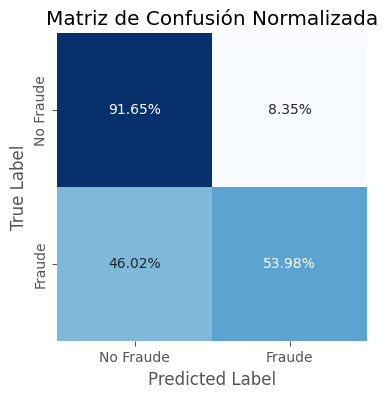

In [ ]:
# Visualizamos resultados en matriz de confusión
conf=confusion_matrix(y_test, y_pred)
class_names = ['No Fraude', 'Fraude']
plot_confusion_matrix(conf, class_names, normalize=True)


### 4.5.3 Prueba 3

Mantenemos un balanceo manual 70/30 e intentamos un PCA = 5.

In [ ]:
#Recuperamos el dataset de antes balanceado 70/30
df_red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/df_red70_train_pca3.csv')

In [ ]:
#Definimos X e y
X = df_red.drop('isfraud', axis=1)
y = df_red['isfraud']

#Dividimos en train y validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#importamos solo el Scaler
ruta_scaler = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/scaler.pkl'

#Escalamos datos
scaler = pickle.load(open(ruta_scaler, 'rb'))
scaled_x_val = scaler.transform(X_val)
scaled_x_train = scaler.transform(X_train)


In [ ]:
#Hacemos PCA = 5
pca_5 = PCA(n_components=5)
pca_5.fit(scaled_x_train)

X_train_pca = pd.DataFrame(pca_5.transform(scaled_x_train), columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])
X_val_pca = pd.DataFrame(pca_5.transform(scaled_x_val), columns=['PC1', 'PC2', 'PC3','PC4','PC5'])

In [ ]:
#Guardamos este PCA para usarlo posteriormente
directorio_modelos = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos"
ruta_pca = os.path.join(directorio_modelos, 'pca_5' + ".pkl")
with open(ruta_pca, "wb") as file:
      pickle.dump(pca_5,file)

In [ ]:
#Comprobación del tamaño de la muestra en este punto
print(f'Tamaño X_train_pca :{X_train_pca.shape}')
print(f'Tamaño y_train :{y_train.shape}')
print(f'Tamaño X_val_pca :{X_val_pca.shape}')
print(f'Tamaño y_val :{y_val.shape}')

Tamaño X_train_pca :(25623, 5)
Tamaño y_train :(25623,)
Tamaño X_val_pca :(6406, 5)
Tamaño y_val :(6406,)


In [ ]:
#Probamos con todos los modelos
nombre_modelo= 'prueba_3'
probar_modelos_clasificacion(X_train_pca, y_train, X_val_pca, y_val,nombre_modelo=nombre_modelo)

Modelo LogisticRegression_prueba_3 guardado exitosamente.
Modelo: LogisticRegression
Confusion Matrix:
 [[4645  237]
 [ 575  949]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4882
           1       0.80      0.62      0.70      1524

    accuracy                           0.87      6406
   macro avg       0.85      0.79      0.81      6406
weighted avg       0.87      0.87      0.87      6406

------------------------------------
Modelo DecisionTreeClassifier_prueba_3 guardado exitosamente.
Modelo: DecisionTreeClassifier
Confusion Matrix:
 [[4562  320]
 [ 334 1190]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4882
           1       0.79      0.78      0.78      1524

    accuracy                           0.90      6406
   macro avg       0.86      0.86      0.86      6406
weighted avg       0.90      0.90      0.90      6406

------------------------------------
Mo

(array([1, 0, 0, ..., 0, 0, 0]),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, ...))

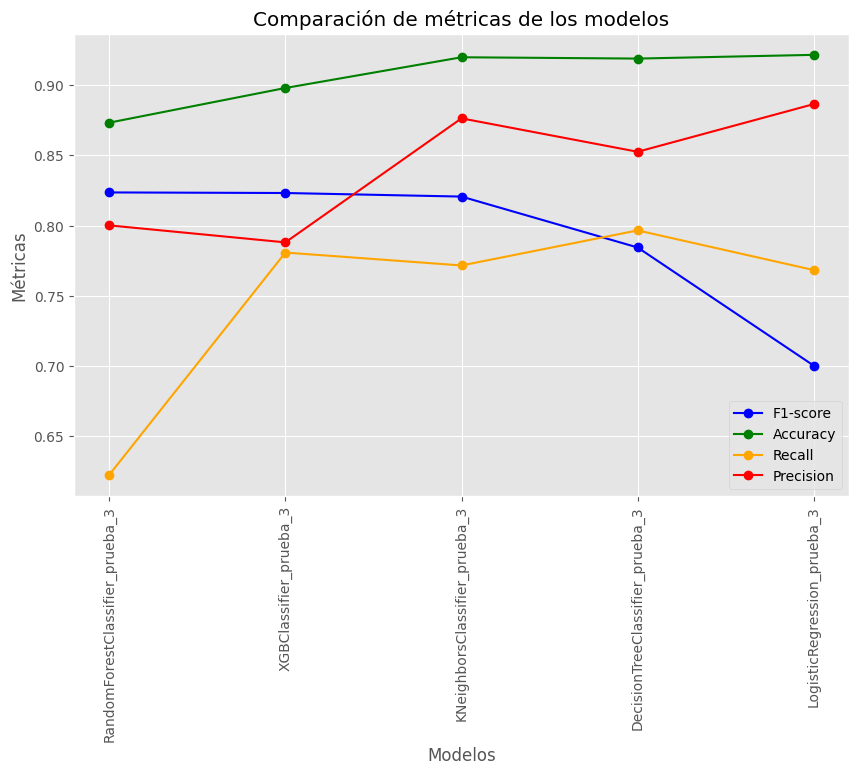

In [ ]:
#Graficamos resultados
model_names = ['LogisticRegression_prueba_3', 'DecisionTreeClassifier_prueba_3', 'KNeighborsClassifier_prueba_3',
               'RandomForestClassifier_prueba_3', 'XGBClassifier_prueba_3']
comparar_metricas_modelos(model_names, X_val_pca, y_val)


#### Test

In [ ]:
#Abrimos nuestro csv con datos de test que separamos al principio.
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/test_df.csv')

In [ ]:
#Definimos X e y
X_test = df_test.drop('isfraud', axis=1)
y_test = df_test['isfraud']

#Realizamos las transformaciones en test
#Cargamos el PCA y el scaler

ruta_pca = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/pca_5.pkl'
ruta_scaler = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/scaler.pkl'

#Escalamos
scaler = pickle.load(open(ruta_scaler, 'rb'))
scaled_X_test = scaler.transform(X_test)

#PCA
pca = pickle.load(open(ruta_pca, 'rb'))
X_test_pca = pd.DataFrame(pca.transform(scaled_X_test), columns=['PC1', 'PC2', 'PC3','PC4','PC5'])

In [ ]:
#Probamos con el mejor modelo de la prueba anterior
model_top3 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/DecisionTreeClassifier_prueba_3.pkl','rb'))
y_pred = model_top3.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    635445
           1       0.02      0.76      0.03       817

    accuracy                           0.94    636262
   macro avg       0.51      0.85      0.50    636262
weighted avg       1.00      0.94      0.97    636262

[[595141  40304]
 [   197    620]]


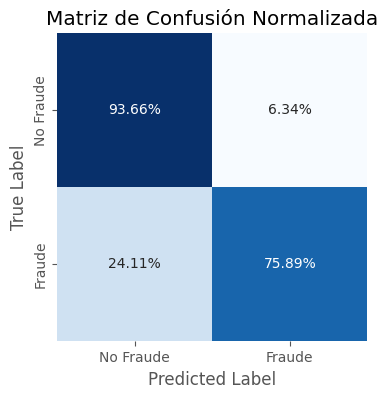

In [ ]:
# Comprobamos resultados con matriz de confusión
conf_prueba3=confusion_matrix(y_test, y_pred)
class_names = ['No Fraude', 'Fraude']
plot_confusion_matrix(conf_prueba3, class_names, normalize=True)


### 4.5.4 Prueba 4

En este caso vamos a hacer un GridSearch intentando que nos dé los mejores hiperparámetros para mejorar la precisión, que es la métrica que está manteniendo en f1-score bajo.

Mantendremos el train balanceado 70/30 y PCA = 5.

In [ ]:
#Recuperamos el dataset de antes balanceado 70/30
df_red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/df_red70_train_pca3.csv')

In [ ]:
#Definimos X e y
X = df_red.drop('isfraud', axis=1)
y = df_red['isfraud']

#Dividimos en train y validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Importamos Scaler y PCA
ruta_scaler = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/scaler.pkl'
ruta_pca = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/pca_5.pkl'

#Escalamos datos
scaler = pickle.load(open(ruta_scaler, 'rb'))
scaled_x_val = scaler.transform(X_val)
scaled_x_train = scaler.transform(X_train)

#PCA
pca = pickle.load(open(ruta_pca, 'rb'))
pca.fit(scaled_x_train)

X_train_pca = pd.DataFrame(pca.transform(scaled_x_train), columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])
X_val_pca = pd.DataFrame(pca.transform(scaled_x_val), columns=['PC1', 'PC2', 'PC3','PC4','PC5'])

In [ ]:
#Logistic regression con scoring= precision
params_grid_lr = dict()
params_grid_lr['solver'] = ['lbfgs', 'saga']
params_grid_lr['penalty'] = ['l1', 'l2', 'elasticnet']
params_grid_lr['C'] = [0.01, 0.1, 1]

lr = LogisticRegression()
gridsearch_lr2 = GridSearchCV(lr, params_grid_lr, scoring='precision', n_jobs=-1, cv=5)
gridsearch_lr2.fit(X_train_pca, y_train)

# Guardarmos el objeto gridsearch_lr2 en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_lr2.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_lr2, f)

In [ ]:
gridsearch_lr2.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
#Desicion Tree con scoring= precision
param_grid_tree = {
    'max_depth': list(range(1,10,2)),
    'min_samples_split':list(range(1,10,2)),
    'min_samples_leaf':list(range(1,10,2)),
    'max_features': [1.0, 'sqrt', 'log2']
}

tree = DecisionTreeClassifier()
gridsearch_tree2 = GridSearchCV(tree, param_grid_tree, scoring='precision', n_jobs=-1, cv=5)
gridsearch_tree2.fit(X_train_pca, y_train)

# Guardamos el objeto gridsearch_tree2 en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_tree2.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_tree2, f)


In [ ]:
gridsearch_tree2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 7,
 'min_samples_split': 3}

In [ ]:
#KNN con scoring= precision
param_grid_knn = {
    'n_neighbors':list(range(2,15)),
    'weights': ['uniform','distance']
}

knn = KNeighborsClassifier()
gridsearch_knn2 = GridSearchCV(knn, param_grid_knn, scoring='precision', n_jobs=-1, cv=5)
gridsearch_knn2.fit(X_train_pca, y_train)

# Guardamos el objeto gridsearch_knn2 en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_knn2.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_knn2, f)

In [ ]:
gridsearch_knn2.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [ ]:
#Random Forest con scoring= precision
param_grid_rf = {
    'n_estimators'  : [90,100,115,130],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
}

rf = RandomForestClassifier()
gridsearch_rf2 = GridSearchCV(rf, param_grid_rf, scoring='precision', n_jobs=-1, cv=5)
gridsearch_rf2.fit(X_train_pca, y_train)

# Guardamos el objeto gridsearch_rf2 en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_rf2.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_rf2, f)

In [ ]:
gridsearch_rf2.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
#XGBoost con scoring= precision
param_grid_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xgb = xgboost.XGBClassifier()
gridsearch_xgb2 = GridSearchCV(xgb, param_grid_xgb, scoring='f1', n_jobs=-1, cv=5)
gridsearch_xgb2.fit(X_train_pca, y_train)

# Guardamos el objeto gridsearch_xgb2 en un archivo pickle
ruta_modelo = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/gridsearch_xgb2.pkl"
with open(ruta_modelo, 'wb') as f:
    pickle.dump(gridsearch_xgb2, f)

In [ ]:
gridsearch_xgb2.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 180}

In [ ]:
#Guardamos los mejores hiperparámetros de el gridsearch anterior
grid_params  = {'lr2':gridsearch_lr2.best_params_,
         'tree2' : gridsearch_tree2.best_params_,
         'knn2' : gridsearch_knn2.best_params_,
         'rf2' : gridsearch_rf2.best_params_,
         'xgb2' : gridsearch_xgb2.best_params_
        }

In [ ]:
#Probamos con todos los modelos
nombre_modelo= 'grid2'
probar_modelos_grid2(X_train_pca, y_train, X_val_pca, y_val, nombre_modelo = nombre_modelo)

Modelo LogisticRegression_grid2 guardado exitosamente.
Modelo: LogisticRegression
Confusion Matrix:
 [[4677  205]
 [ 607  917]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4882
           1       0.82      0.60      0.69      1524

    accuracy                           0.87      6406
   macro avg       0.85      0.78      0.81      6406
weighted avg       0.87      0.87      0.87      6406

------------------------------------
Modelo DecisionTreeClassifier_grid2 guardado exitosamente.
Modelo: DecisionTreeClassifier
Confusion Matrix:
 [[4773  109]
 [ 514 1010]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4882
           1       0.90      0.66      0.76      1524

    accuracy                           0.90      6406
   macro avg       0.90      0.82      0.85      6406
weighted avg       0.90      0.90      0.90      6406

------------------------------------
Modelo K

(array([1, 0, 0, ..., 0, 0, 0]),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=180, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...))

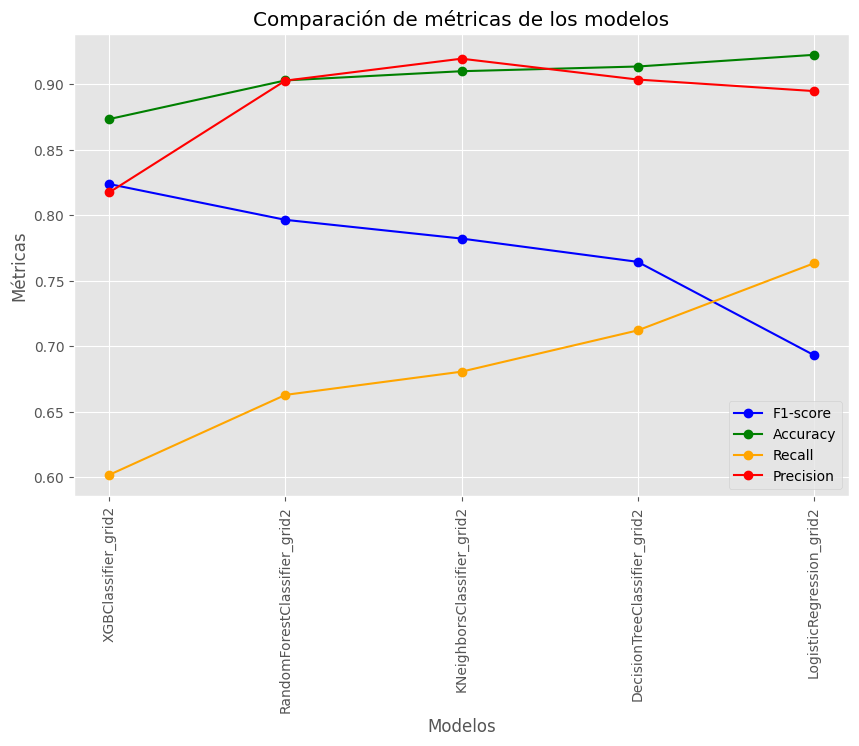

In [ ]:
#Graficamos resultados
model_names = ['LogisticRegression_grid2', 'DecisionTreeClassifier_grid2', 'KNeighborsClassifier_grid2',
               'RandomForestClassifier_grid2', 'XGBClassifier_grid2']
comparar_metricas_modelos(model_names, X_val_pca, y_val)


#### Test

In [ ]:
#Abrimos nuestro csv con datos de test que separamos al principio.
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/data/processed/test_df.csv')

In [ ]:
#Definimos X e y
X_test = df_test.drop('isfraud', axis=1)
y_test = df_test['isfraud']

In [ ]:
#Definimos X e y
X_test = df_test.drop('isfraud', axis=1)
y_test = df_test['isfraud']

#Realizamos las transformaciones en test
#Cargamos el PCA y el scaler

ruta_pca = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/pca_5.pkl'
ruta_scaler = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/scaler.pkl'

#Escalamos
scaler = pickle.load(open(ruta_scaler, 'rb'))
scaled_X_test = scaler.transform(X_test)

#PCA
pca = pickle.load(open(ruta_pca, 'rb'))
X_test_pca = pd.DataFrame(pca.transform(scaled_X_test), columns=['PC1', 'PC2', 'PC3','PC4','PC5'])

In [ ]:
#Probamos el mejor modelo de la prueba anterior
model_top4 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/XGBClassifier_grid2.pkl','rb'))
y_pred = model_top4.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    635445
           1       0.03      0.77      0.06       817

    accuracy                           0.97    636262
   macro avg       0.52      0.87      0.52    636262
weighted avg       1.00      0.97      0.98    636262

[[615953  19492]
 [   191    626]]


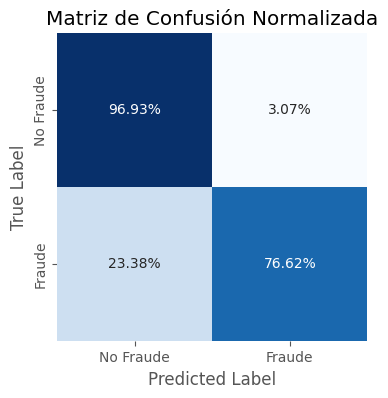

In [ ]:
# Visualizamos resultados en matriz de confusión
conf_prueba4=confusion_matrix(y_test, y_pred)
class_names = ['No Fraude', 'Fraude']
plot_confusion_matrix(conf_prueba4, class_names, normalize=True)

Este último modelo es el que mejor resultados nos ha dado, por lo que se convertirá en el modelo que usaremos en la aplicación.

Los datos de la matriz de confusión nos dan los argumentos necesarios para elegir este modelos. Se explica a continuación:

- El **96.93%** de las transacciones no fraudulentas las predice como no fraudulentas.

- El **3.07%** de las transacciones no fraudulentas las predice como fraudulentas.

- El **76.62%** de las transacciones fraudulentas las predice como fraudulentas.

- El **23.38%** de las transacciones fraudulentas las predice como no fraudulentas.


## 4.6 Guardando el modelo final

In [ ]:
ruta = '/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos/XGBClassifier_grid2.pkl'

In [ ]:
my_model = pickle.load(open(ruta, 'rb'))

In [ ]:
directorio_modelos = "/content/drive/MyDrive/Colab Notebooks/Proyecto final_fraude/src/modelos"
ruta_modelo = os.path.join(directorio_modelos, 'my_model' + ".pkl")
with open(ruta_modelo, "wb") as file:
      pickle.dump(my_model,file)